# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [327]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 999

In [328]:
plant = pd.read_csv("data/31.finaldata_plant/plant_wsASOSsky_cloud.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,CLOUD
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,4,18.00,38.00,14.00,18.00,59.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.00,0.0,1.0,0.0
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,4,18.00,38.00,14.00,18.00,59.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.250,1.500,142.750,23.000000,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.000000,0.300000,10.0,4.0,9.8,1015.0,44.000000,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.00,0.0,2.0,0.0
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-5.530449,7.00,3.00,4,18.00,38.00,14.00,18.00,59.00,1012.3,1015.0,0.0,4.200,1.150,1.700,179.850,2.625,172.275,187.000000,2.0,3.2,1014.8,77.0,6.4,0.0,0.0,130.000000,3.700000,143.0,5.0,9.0,1014.9,55.000000,3.7,0.0,76.0,0.4,1011.9,1015.5,66.2,0.00,0.0,4.0,0.0
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.530449,-5.00,3.00,4,18.00,38.00,14.00,18.00,59.00,1013.5,1016.2,0.0,10.575,0.775,1.275,208.075,2.150,203.200,186.000000,2.0,3.2,1015.7,51.0,9.6,0.0,0.0,51.000000,1.500000,143.0,5.0,8.8,1016.7,56.000000,12.9,0.0,294.2,0.7,1013.2,1016.7,41.2,1.39,6960.0,4.0,0.0
4,2016-04-01 12:00:00,1,1,16.00,28.00,10.00,18.00,20.00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-7.667883,-2.00,6.00,4,18.00,38.00,14.00,18.00,59.00,1013.2,1015.8,0.0,18.825,1.850,2.650,175.300,3.925,165.250,348.000000,1.0,2.2,1016.5,82.0,8.5,0.0,0.0,210.000000,1.100000,143.0,5.0,9.6,1016.5,55.000000,20.5,0.0,212.9,2.4,1012.4,1015.8,24.1,7.05,17760.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-4.145921,3.57,-1.24,3,10.92,54.76,10.56,9.66,69.72,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.000000,8.0,10.0,1023.7,57.0,5.6,2.0,0.0,300.000000,8.000000,313.0,14.0,5.0,1023.2,48.000000,3.4,0.0,319.3,3.5,1020.8,1024.0,55.3,22.30,36600.0,2.0,4.0
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.928584,3.54,-1.31,3,10.92,54.76,10.56,9.66,69.72,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.666667,8.0,10.1,1023.7,57.0,5.6,2.0,0.0,299.666667,8.066667,313.0,14.0,5.0,1023.2,47.333333,3.1,0.0,314.6,2.6,1020.8,1024.1,57.8,22.30,36600.0,2.0,4.0
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-3.701684,3.63,-1.31,3,10.92,54.76,10.56,9.66,69.72,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,334.333333,8.0,10.2,1023.7,57.0,5.6,2.0,0.0,299.333333,8.133333,313.0,14.0,5.0,1023.2,46.666667,2.7,0.0,336.2,2.4,1020.9,1024.2,59.6,22.30,36600.0,2.0,4.0
349315,2019-03-31 23:30:00,2,3,8.32,39.13,9.49,4.57,51.47,0.0,2019-04-01 23:30:00,0.0,2019-04-02 23:30:00,0.0,-3.728437,3.75,-1.17,3,10.92,54.76,10.56,9.66,69.72,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,335.000000,8.0,10.3,1023.7,57.0,

In [329]:
plant.columns

Index(['MEA_DDHR', 'PLANT', 'LOC', 'TEM_IN', 'HUM_IN', 'TEM_COIL',
       'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'COND_LOC', 'X24H_TMA', 'X24H_COND_LOC',
       'X48H_TMA', 'X48H_COND_LOC', 'DEW_POINT_COIL', 'IN_OUT_TEM_D',
       'IN_COIL_TEM_D', 'MONTH', 'TEM_IN_MAX', 'HUM_IN_MAX', 'TEM_COIL_MAX',
       'TEM_OUT_LOC1_MAX', 'HUM_OUT_LOC1_MAX', 'AVG_PA', 'AVG_PS', 'HR1_RN',
       'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS',
       'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM',
       'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD',
       'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'ASOS_TEMP', 'ASOS_RAIN_CUM',
       'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS',
       'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE', 'SKY', 'CLOUD'],
      dtype='object')

## 정규화 할 list 나누기

In [330]:
dummy_list = ["MONTH", "SKY"]
caling_list= ["AVG_PA", "AVG_PS", "HR1_RN", "AVG_TA", "AVG_WS", "MAX_WS", "MAX_WS_WD", "MAX_INS_WS", "MAX_INS_WS_WD", "WD_N1", "WS_N1", "GUST_WS_N1", "PA", "BUOY_HM", "BUOY_TA", "MAX_WH", "AVG_WH", "LB_WD", "LB_WS", "LB_MAX_INS_WD", "LB_MAX_IWS", "LB_TA", "LB_PS", "LB_HM"]

In [331]:
caling_list.extend(["DEW_POINT_COIL", "IN_COIL_TEM_D", "ASOS_RAIN_CUM", "ASOS_TEMP", "ASOS_WIND_DIR", "ASOS_WIND_SPD", "ASOS_PRESS", "ASOS_SEA_PRESS", "ASOS_HUMID", "ASOS_SOLAR_RAD", "ASOS_SUNSHINE", 
                   'TEM_IN_MAX', 'HUM_IN_MAX','TEM_COIL_MAX', 'TEM_OUT_LOC1_MAX', 'HUM_OUT_LOC1_MAX'])
caling_list

['AVG_PA',
 'AVG_PS',
 'HR1_RN',
 'AVG_TA',
 'AVG_WS',
 'MAX_WS',
 'MAX_WS_WD',
 'MAX_INS_WS',
 'MAX_INS_WS_WD',
 'WD_N1',
 'WS_N1',
 'GUST_WS_N1',
 'PA',
 'BUOY_HM',
 'BUOY_TA',
 'MAX_WH',
 'AVG_WH',
 'LB_WD',
 'LB_WS',
 'LB_MAX_INS_WD',
 'LB_MAX_IWS',
 'LB_TA',
 'LB_PS',
 'LB_HM',
 'DEW_POINT_COIL',
 'IN_COIL_TEM_D',
 'ASOS_RAIN_CUM',
 'ASOS_TEMP',
 'ASOS_WIND_DIR',
 'ASOS_WIND_SPD',
 'ASOS_PRESS',
 'ASOS_SEA_PRESS',
 'ASOS_HUMID',
 'ASOS_SOLAR_RAD',
 'ASOS_SUNSHINE',
 'TEM_IN_MAX',
 'HUM_IN_MAX',
 'TEM_COIL_MAX',
 'TEM_OUT_LOC1_MAX',
 'HUM_OUT_LOC1_MAX']

In [332]:
plant = etl.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE', 'TEM_IN_MAX', 'HUM_IN_MAX', 'TEM_COIL_MAX', 'TEM_OUT_LOC1_MAX', 'HUM_OUT_LOC1_MAX']
dummy_category: ['PLANT', 'LOC', 'MONTH', 'SKY']


,MEA_DDHR,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,IN_OUT_TEM_D,CLOUD,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,SKY_1.0,SKY_2.0,SKY_3.0,SKY_4.0
0,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,7.0,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229670,-0.211555,-0.148468,-0.372569,-1.245268,-1.259860,-0.968852,-1.345273,-0.755761,-0.432416,-0.750824,-0.865564,-0.296887,-0.038892,-0.363992,-0.63,-0.2802,-1.175731,-1.284411,-1.300031,-1.093299,-0.277472,-0.247001,-0.806385,-1.265315,2.696145,-0.185367,-0.386511,1.392048,-0.921388,-0.383478,-0.363822,-1.607885,-0.877905,-0.870930,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,7.0,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356582,-0.337899,-0.148468,-0.561719,-1.204603,-1.204814,-0.484307,-1.207418,-0.755416,-1.477736,0.675089,0.417026,0.557738,-1.204149,-0.599811,-0.63,-0.2802,0.215270,-1.453206,-1.742111,-1.093299,-0.197755,-0.327798,-1.415081,-1.168263,2.103933,-0.185367,-0.386511,1.392048,-0.921388,-0.383478,-0.363822,-1.607885,-0.877905,-0.870930,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2016-04-01 06:00:00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,7.0,0.0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.345045,-0.326413,-0.148468,-0.688560,-0.696289,-0.672703,-0.274045,-0.690461,-0.347900,-0.049132,-0.750824,-0.714671,-0.377730,0.252422,-0.588582,-0.63,-0.2802,-0.693517,-0.305403,-0.566179,-0.852568,-0.277472,-0.339340,-0.806385,-0.983448,1.511720,-0.185367,-0.726502,-0.572524,-0.921388,-0.325472,-0.294556,-0.342396,-0.877905,-0.870930,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2016-04-01 09:00:00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.0,0.0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.206595,-0.188583,-0.148468,-0.121111,-1.001277,-0.984630,0.106380,-0.908731,0.078939,-0.057843,-0.750824,-0.714671,-0.273789,-1.262411,-0.229238,-0.63,-0.2802,-1.426112,-1.048099,-0.566179,-0.852568,-0.297401,-0.131577,-0.751049,-0.983448,1.511720,-0.185367,0.096634,1.016318,-0.730175,-0.174656,-0.156023,-1.563910,-0.697616,-0.372484,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,2016-04-01 12:00:00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-2.0,1.0,-0.036700,-1.768877,-0.585582,0.395291,-2.232452,-0.241207,-0.234526,-0.148468,0.613235,-0.126977,0.024546,-0.335371,-0.093088,-0.444862,1.353339,-1.107302,-0.966160,-0.181397,0.543736,-0.352763,-0.63,-0.2802,0.048350,-1.183134,-0.566179,-0.852568,-0.217684,-0.154662,-0.806385,-1.168263,3.288358,-0.185367,0.776615,0.424325,0.353366,-0.267466,-0.259922,-2.399426,0.036514,0.400968,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [333]:
plant = plant.drop(['COND_LOC', 'CLOUD'], axis=1)
plant

,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,IN_OUT_TEM_D,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,SKY_1.0,SKY_2.0,SKY_3.0,SKY_4.0
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,7.00,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229670,-0.211555,-0.148468,-0.372569,-1.245268,-1.259860,-0.968852,-1.345273,-0.755761,-0.432416,-0.750824,-0.865564,-0.296887,-0.038892,-0.363992,-0.630000,-0.2802,-1.175731,-1.284411,-1.300031,-1.093299,-0.277472,-0.247001,-0.806385,-1.265315,2.696145,-0.185367,-0.386511,1.392048,-0.921388,-0.383478,-0.363822,-1.607885,-0.877905,-0.870930,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,7.00,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356582,-0.337899,-0.148468,-0.561719,-1.204603,-1.204814,-0.484307,-1.207418,-0.755416,-1.477736,0.675089,0.417026,0.557738,-1.204149,-0.599811,-0.630000,-0.2802,0.215270,-1.453206,-1.742111,-1.093299,-0.197755,-0.327798,-1.415081,-1.168263,2.103933,-0.185367,-0.386511,1.392048,-0.921388,-0.383478,-0.363822,-1.607885,-0.877905,-0.870930,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2016-04-01 06:00:00,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,7.00,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.345045,-0.326413,-0.148468,-0.688560,-0.696289,-0.672703,-0.274045,-0.690461,-0.347900,-0.049132,-0.750824,-0.714671,-0.377730,0.252422,-0.588582,-0.630000,-0.2802,-0.693517,-0.305403,-0.566179,-0.852568,-0.277472,-0.339340,-0.806385,-0.983448,1.511720,-0.185367,-0.726502,-0.572524,-0.921388,-0.325472,-0.294556,-0.342396,-0.877905,-0.870930,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2016-04-01 09:00:00,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.00,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.206595,-0.188583,-0.148468,-0.121111,-1.001277,-0.984630,0.106380,-0.908731,0.078939,-0.057843,-0.750824,-0.714671,-0.273789,-1.262411,-0.229238,-0.630000,-0.2802,-1.426112,-1.048099,-0.566179,-0.852568,-0.297401,-0.131577,-0.751049,-0.983448,1.511720,-0.185367,0.096634,1.016318,-0.730175,-0.174656,-0.156023,-1.563910,-0.697616,-0.372484,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,2016-04-01 12:00:00,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-2.00,-0.036700,-1.768877,-0.585582,0.395291,-2.232452,-0.241207,-0.234526,-0.148468,0.613235,-0.126977,0.024546,-0.335371,-0.093088,-0.444862,1.353339,-1.107302,-0.966160,-0.181397,0.543736,-0.352763,-0.630000,-0.2802,0.048350,-1.183134,-0.566179,-0.852568,-0.217684,-0.154662,-0.806385,-1.168263,3.288358,-0.185367,0.776615,0.424325,0.353366,-0.267466,-0.259922,-2.399426,0.036514,0.400968,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,3.57,-0.809775,-1.060492,-0.632083,-0.803207,-0.582818,0.670254,0.661369,-0.148468,-0.750868,0.584662,0.556657,1.179590,0.757019,1.389132,1.222674,

## test_data validation & 정규화 preprocessing

In [334]:
test_data = pd.read_csv("data/31.finaldata_plant/test_wsASOSsky_cloud.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,CLOUD
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,3.97,-1.93,4,11.62,40.93,10.10,12.26,54.82,1021.200,1023.7,0.0,3.15000,2.125,2.55000,269.3250,4.2500,283.350,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0,2.0,0.0,330.3,1.7,1020.9,1024.2,63.0,22.30,36600.0,1.0,0.0
1,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,-2.81,0.38,4,11.62,40.93,10.10,12.26,54.82,1021.525,1024.0,0.0,4.50625,2.625,3.09375,283.4875,5.2125,276.500,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0,8.4,0.0,9.3,3.4,1021.8,1025.0,32.1,5.00,12360.0,1.0,0.0
2,2019-04-01 18:30:00,2,3,11.62,25.55,9.45,7.99,31.81,2019-04-02 18:30:00,NaN,2019-04-03 18:30:00,NaN,-9.311685,3.63,2.17,4,11.62,40.93,10.10,12.26,54.82,1021.850,1024.3,0.0,5.86250,3.125,3.63750,297.6500,6.1750,269.650,268.0,4.0,5.5,1022.1,50.0,6.7,0.0,0.0,210.0,6.5,300.0,9.0,6.4,1021.6,47.0,7.6,0.0,324.4,3.2,1019.0,1022.2,30.0,21.24,38760.0,1.0,0.0
3,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,3.94,-0.76,4,10.03,48.81,10.79,6.09,59.34,1022.175,1024.6,0.0,7.21875,3.625,4.18125,311.8125,7.1375,262.800,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0,-1.2,0.0,98.1,0.3,1020.4,1023.7,84.7,0.00,0.0,1.0,0.0
4,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0.00,1.46,4,12.32,34.13,10.86,12.32,28.27,1022.500,1024.9,0.0,8.57500,4.125,4.72500,325.9750,8.1000,255.950,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0,9.2,0.0,355.5,3.2,1021.6,1024.8,25.6,6.18,14160.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,4.45,-2.57,3,10.73,33.36,13.30,6.28,46.37,1020.500,1023.0,0.0,1.45000,1.225,1.40000,252.4250,2.1750,263.025,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0,-0.8,0.0,47.8,0.5,1019.9,1023.1,79.8,0.00,0.0,3.0,8.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,7.76,-2.55,3,9.15,38.86,11.70,1.39,74.33,1020.700,1023.2,0.0,0.17500,0.875,1.22500,163.2500,1.5250,184.275,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0,-1.4,0.0,326.3,0.4,1020.0,1023.2,84.8,0.00,0.0,3.0,8.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,2.84,-1.93,3,7.10,44.87,9.03,4.26,58.06,1021.300,1023.8,0.0,-0.50000,1.200,1.65000,179.4500,2.3750,170.900,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,29.0,3.3,338.0,8.0,3.9,1023.9,46.0,-1.6,0.0,59.1,1.5,1020.5,1023.7,90.4,0.05,60.0,3.0,8.0
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-3.401824,0.64,1.34,3,14.21,34.43,12.77,12.90,43.96,1021.300,1023.8,0.0,-0.50000,1.200,1.65000,179.4500,2.3750,170.900,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,149.0,0.9,338.0,8.0,7.2,1023.6,49.0,12.2,0.0,307.5,1.1,1019.4,1022.5,36.8,8.33,16260.0,3.0,8.0


In [335]:
test_data.dtypes

MEA_DDHR             object
PLANT                 int64
LOC                   int64
TEM_IN              float64
HUM_IN              float64
TEM_COIL            float64
TEM_OUT_LOC1        float64
HUM_OUT_LOC1        float64
X24H_TMA             object
X24H_COND_LOC       float64
X48H_TMA             object
X48H_COND_LOC       float64
DEW_POINT_COIL      float64
IN_OUT_TEM_D        float64
IN_COIL_TEM_D       float64
MONTH                 int64
TEM_IN_MAX          float64
HUM_IN_MAX          float64
TEM_COIL_MAX        float64
TEM_OUT_LOC1_MAX    float64
HUM_OUT_LOC1_MAX    float64
AVG_PA              float64
AVG_PS              float64
HR1_RN              float64
AVG_TA              float64
AVG_WS              float64
MAX_WS              float64
MAX_WS_WD           float64
MAX_INS_WS          float64
MAX_INS_WS_WD       float64
WD_N1               float64
WS_N1               float64
GUST_WS_N1          float64
PA                  float64
BUOY_HM             float64
BUOY_TA             

In [336]:
test_data = test_data.drop(['CLOUD'], axis=1)

In [337]:
test = pd.to_datetime(test_data["MEA_DDHR"])

In [338]:
test.sort_index()

0      2019-04-01 00:00:00
1      2019-04-01 10:30:00
2      2019-04-01 18:30:00
3      2019-04-01 04:30:00
4      2019-04-01 11:00:00
               ...        
3534   2020-03-29 03:00:00
3535   2020-03-29 05:00:00
3536   2020-03-29 07:00:00
3537   2020-03-29 11:30:00
3538   2020-03-29 19:30:00
Name: MEA_DDHR, Length: 3539, dtype: datetime64[ns]

In [339]:
test = etl.preprosess(test_data,caling_list,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE', 'TEM_IN_MAX', 'HUM_IN_MAX', 'TEM_COIL_MAX', 'TEM_OUT_LOC1_MAX', 'HUM_OUT_LOC1_MAX']
dummy_category: ['PLANT', 'LOC', 'MONTH', 'SKY']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,IN_OUT_TEM_D,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,SKY_1.0,SKY_2.0,SKY_3.0,SKY_4.0
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,3.97,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.725499,0.734908,-0.208742,-0.994913,0.167959,0.013036,1.223025,0.115448,1.479001,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,-1.476814,-0.243252,-1.100302,1.559311,-0.064711,0.786079,0.804536,-0.488158,1.992830,1.899100,-0.664671,-1.410000,-0.682722,-0.382306,-1.116653,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-2.81,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.763905,0.770003,-0.208742,-0.848187,0.608888,0.448104,1.428419,0.592980,1.378825,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-0.070835,-0.243252,-0.421982,-1.155111,1.043042,0.893073,0.898437,-1.959374,-0.202525,0.099025,-0.664671,-1.410000,-0.682722,-0.382306,-1.116653,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2019-04-01 18:30:00,2019-04-02 18:30:00,NaN,2019-04-03 18:30:00,NaN,3.63,-0.536309,-2.127408,-0.715103,-0.616697,-1.707250,0.802312,0.805097,-0.208742,-0.701461,1.049818,0.883173,1.633813,1.070512,1.278648,0.795034,-0.000611,-0.082335,0.536471,-1.975724,-0.744237,-0.446039,-0.16337,0.170056,0.818630,0.923601,0.243787,-0.663035,0.499920,-1.657072,-1.561022,1.018647,-0.243252,-0.506772,1.509420,0.912718,0.560202,0.569784,-2.059359,1.858317,2.059503,-0.664671,-1.410000,-0.682722,-0.382306,-1.116653,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,3.94,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.840719,0.840191,-0.208742,-0.554735,1.490748,1.318241,1.839208,1.548043,1.178472,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,-0.764695,-0.243252,-1.439463,-0.404205,-0.976978,0.726637,0.745848,0.545025,-0.837021,-0.818835,-0.851922,-0.811762,-0.603737,-1.039041,-0.861731,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,0.00,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.879126,0.875285,-0.208742,-0.408009,1.931677,1.753310,2.044602,2.025575,1.078296,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,0.586506,-0.243252,-0.337191,1.772406,0.912718,0.869296,0.874961,-2.268853,-0.052784,0.232694,-0.582234,-1.926246,-0.595724,-0.375919,-2.614035,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# 데이터 분류

## plant_train 데이터
### train, test 데이터 분리

In [340]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)
plant

,X24H_COND_LOC,X48H_COND_LOC,IN_OUT_TEM_D,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,SKY_1.0,SKY_2.0,SKY_3.0,SKY_4.0
0,0.0,0.0,7.00,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229670,-0.211555,-0.148468,-0.372569,-1.245268,-1.259860,-0.968852,-1.345273,-0.755761,-0.432416,-0.750824,-0.865564,-0.296887,-0.038892,-0.363992,-0.630000,-0.2802,-1.175731,-1.284411,-1.300031,-1.093299,-0.277472,-0.247001,-0.806385,-1.265315,2.696145,-0.185367,-0.386511,1.392048,-0.921388,-0.383478,-0.363822,-1.607885,-0.877905,-0.870930,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,7.00,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356582,-0.337899,-0.148468,-0.561719,-1.204603,-1.204814,-0.484307,-1.207418,-0.755416,-1.477736,0.675089,0.417026,0.557738,-1.204149,-0.599811,-0.630000,-0.2802,0.215270,-1.453206,-1.742111,-1.093299,-0.197755,-0.327798,-1.415081,-1.168263,2.103933,-0.185367,-0.386511,1.392048,-0.921388,-0.383478,-0.363822,-1.607885,-0.877905,-0.870930,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,7.00,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.345045,-0.326413,-0.148468,-0.688560,-0.696289,-0.672703,-0.274045,-0.690461,-0.347900,-0.049132,-0.750824,-0.714671,-0.377730,0.252422,-0.588582,-0.630000,-0.2802,-0.693517,-0.305403,-0.566179,-0.852568,-0.277472,-0.339340,-0.806385,-0.983448,1.511720,-0.185367,-0.726502,-0.572524,-0.921388,-0.325472,-0.294556,-0.342396,-0.877905,-0.870930,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,-5.00,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.206595,-0.188583,-0.148468,-0.121111,-1.001277,-0.984630,0.106380,-0.908731,0.078939,-0.057843,-0.750824,-0.714671,-0.273789,-1.262411,-0.229238,-0.630000,-0.2802,-1.426112,-1.048099,-0.566179,-0.852568,-0.297401,-0.131577,-0.751049,-0.983448,1.511720,-0.185367,0.096634,1.016318,-0.730175,-0.174656,-0.156023,-1.563910,-0.697616,-0.372484,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,-2.00,-0.036700,-1.768877,-0.585582,0.395291,-2.232452,-0.241207,-0.234526,-0.148468,0.613235,-0.126977,0.024546,-0.335371,-0.093088,-0.444862,1.353339,-1.107302,-0.966160,-0.181397,0.543736,-0.352763,-0.630000,-0.2802,0.048350,-1.183134,-0.566179,-0.852568,-0.217684,-0.154662,-0.806385,-1.168263,3.288358,-0.185367,0.776615,0.424325,0.353366,-0.267466,-0.259922,-2.399426,0.036514,0.400968,-0.069129,-2.181771,-0.270725,-0.130066,-1.993689,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,0.0,0.0,3.57,-0.809775,-1.060492,-0.632083,-0.803207,-0.582818,0.670254,0.661369,-0.148468,-0.750868,0.584662,0.556657,1.179590,0.757019,1.389132,1.222674,1.388046,0.995450,0.650130,-0.912834,-0.678417,2.107296,-0.2802,0.882951,1.146228,0.936892,1.314014,-0.676054,0.618677,-1.193737,-0.863733,-0.999261,-0.185367,-0.753343,1.199086,1.054480,0.707037,0.686714,-0.874976,2.014514,1.750210,-0.778961,-0.737273,-0.612686,-0.874794,-1.083783,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
349313,0.0,0.0,3.54,-0.812784,-1.022981,-0.628125,-0.803207,-0.522647,0.67

In [341]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train_y = plant[['X24H_COND_LOC', 'X48H_COND_LOC']]

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X,train_y, test_size=0.3, shuffle=True, random_state=42, stratify=train_y)

In [343]:
y_train24 = y_train[['X24H_COND_LOC']]
y_train48 = y_train[['X48H_COND_LOC']]
y_val24 = y_val[['X24H_COND_LOC']]
y_val48 = y_val[['X48H_COND_LOC']]

## Random UnderSampling
-- Sampling 변수를 잘 확인해야함

In [344]:
from imblearn.under_sampling import *

In [345]:
rus = RandomUnderSampler(random_state=42)

In [346]:
X_undersampled24, y_undersampled24 = rus.fit_resample(X_train, y_train24)
X_undersampled48, y_undersampled48 = rus.fit_resample(X_train, y_train48)

## test_data 만들기

In [347]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

In [348]:
test_X

,IN_OUT_TEM_D,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,SKY_1.0,SKY_2.0,SKY_3.0,SKY_4.0
0,3.97,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.725499,0.734908,-0.208742,-0.994913,0.167959,0.013036,1.223025,0.115448,1.479001,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,-1.476814,-0.243252,-1.100302,1.559311,-0.064711,0.786079,0.804536,-0.488158,1.992830,1.899100,-0.664671,-1.410000,-0.682722,-0.382306,-1.116653,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,-2.81,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.763905,0.770003,-0.208742,-0.848187,0.608888,0.448104,1.428419,0.592980,1.378825,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-0.070835,-0.243252,-0.421982,-1.155111,1.043042,0.893073,0.898437,-1.959374,-0.202525,0.099025,-0.664671,-1.410000,-0.682722,-0.382306,-1.116653,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,3.63,-0.536309,-2.127408,-0.715103,-0.616697,-1.707250,0.802312,0.805097,-0.208742,-0.701461,1.049818,0.883173,1.633813,1.070512,1.278648,0.795034,-0.000611,-0.082335,0.536471,-1.975724,-0.744237,-0.446039,-0.16337,0.170056,0.818630,0.923601,0.243787,-0.663035,0.499920,-1.657072,-1.561022,1.018647,-0.243252,-0.506772,1.509420,0.912718,0.560202,0.569784,-2.059359,1.858317,2.059503,-0.664671,-1.410000,-0.682722,-0.382306,-1.116653,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,3.94,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.840719,0.840191,-0.208742,-0.554735,1.490748,1.318241,1.839208,1.548043,1.178472,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,-0.764695,-0.243252,-1.439463,-0.404205,-0.976978,0.726637,0.745848,0.545025,-0.837021,-0.818835,-0.851922,-0.811762,-0.603737,-1.039041,-0.861731,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.00,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.879126,0.875285,-0.208742,-0.408009,1.931677,1.753310,2.044602,2.025575,1.078296,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,0.586506,-0.243252,-0.337191,1.772406,0.912718,0.869296,0.874961,-2.268853,-0.052784,0.232694,-0.582234,-1.926246,-0.595724,-0.375919,-2.614035,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4.45,-0.639614,-1.563968,-0.277684,-0.797087,-0.973308,0.642776,0.653022,-0.208742,-1.178828,-0.625715,-0.907109,0.977929,-0.914036,1.181763,-1.461947,0.720434,0.550731,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,1.386802,-0.015526,1.263465,-0.014602,-0.844050,0.651951,-1.722919,-0.880800,-1.866349,-0.243252,-1.397068,-0.829549,-0.846654,0.667196,0.675422,0.311726,-0.837021,-0.818835,-0.769484,-1.984703,-0.316415,-1.018818,-1.593221,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3535,7.76,-0.823010,-1.167179,-0.459468,-1.312941,0.436104,0.666411,0.676418,-0.208742,-1.316764,-0.934365,-1.047131,-0.315348,-1.236525,0.030100,-1.535644,0.720434,0.694610,0.630048,-1.830636,-0.796091,-0.446039,-0.1

# Random Forest
## 24시간 후 결로 예측

### UnderSampling

In [349]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under24 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under24.fit(X_undersampled24, y_undersampled24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=10, random_state=42)

In [350]:
y_pred_under24 = rf_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.13      0.97      0.23       594

    accuracy                           0.96    104796
   macro avg       0.57      0.97      0.61    104796
weighted avg       0.99      0.96      0.98    104796



## 변수 중요도

In [351]:
rf_clf_under24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_clf_under24.feature_importances_], columns=['variable', 'importance'])
rf_clf_under24_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under24_df.tail(20)

,variable,importance
46,PLANT_1,0.00268992
55,MONTH_5,0.00137058
53,MONTH_3,0.00136193
59,MONTH_9,0.00129168
61,MONTH_11,0.00103689
48,LOC_1,0.000902883
62,MONTH_12,0.000738458
50,LOC_3,0.000700769
47,PLANT_2,0.000606416
65,SKY_3.0,0.000443888


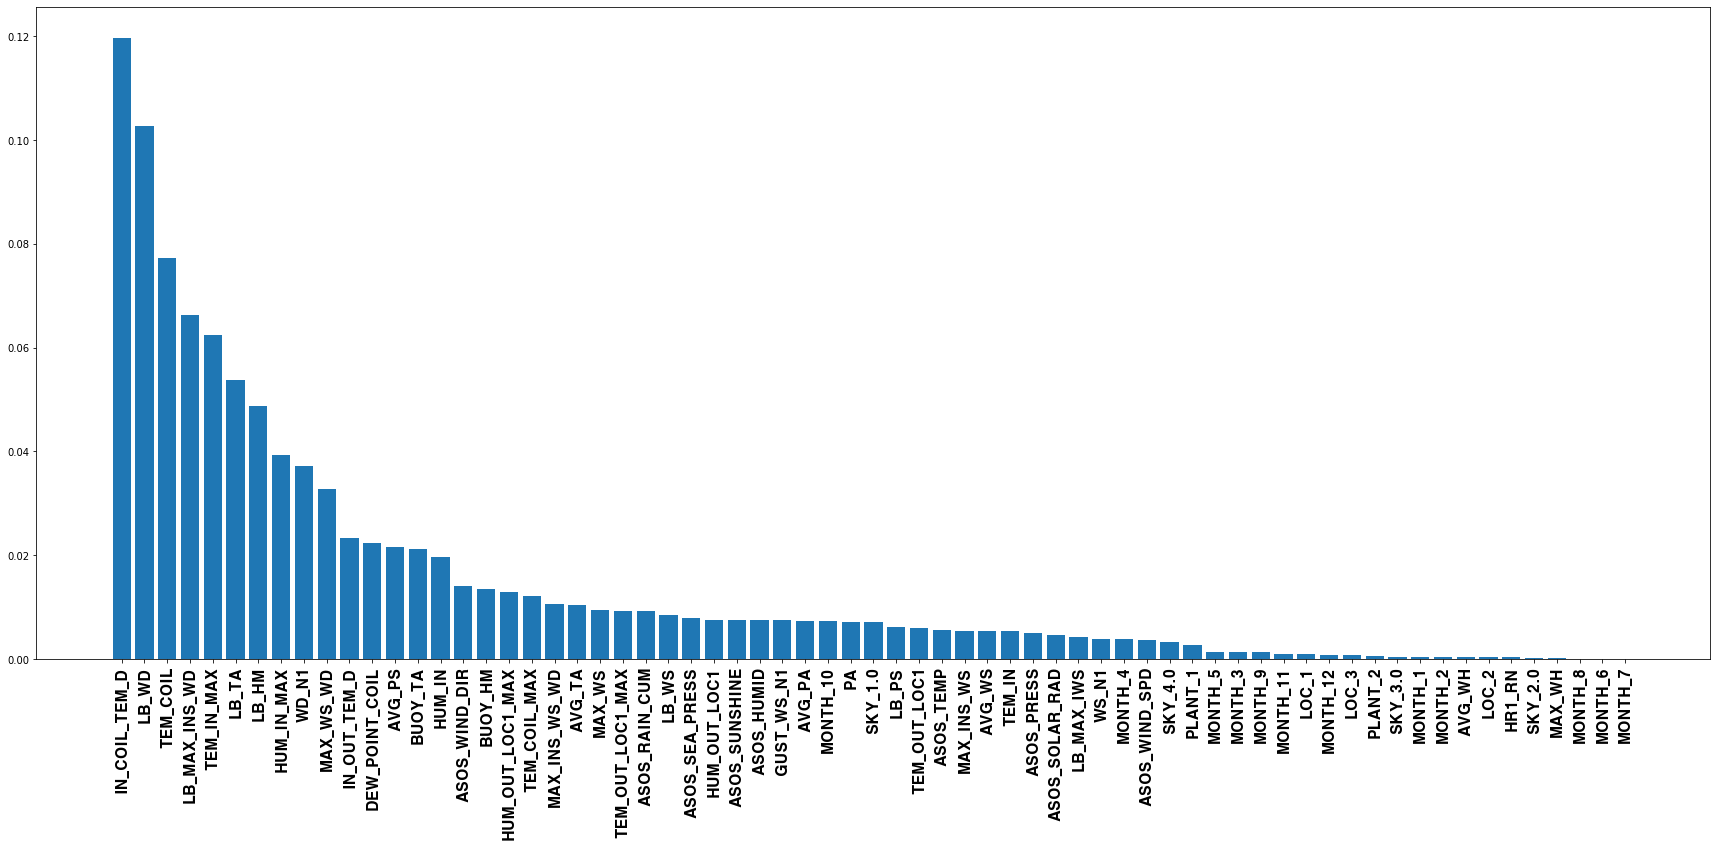

In [352]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48시간 결로 예측

### UnderSampling

In [353]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under48 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under48.fit(X_undersampled48, y_undersampled48)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=10, random_state=42)

In [354]:
y_pred_under48 = rf_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    104202
         1.0       0.19      0.97      0.31       594

    accuracy                           0.98    104796
   macro avg       0.59      0.97      0.65    104796
weighted avg       1.00      0.98      0.98    104796



## 변수 중요도

In [355]:
rf_clf_under48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_clf_under48.feature_importances_], columns=['variable', 'importance'])
rf_clf_under48_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under48_df.tail(20)

,variable,importance
63,SKY_1.0,0.00466761
21,MAX_WH,0.00462137
10,AVG_WS,0.00442068
35,ASOS_WIND_SPD,0.00399087
8,HR1_RN,0.00331895
61,MONTH_11,0.00303697
66,SKY_4.0,0.00297896
50,LOC_3,0.0020588
22,AVG_WH,0.00165158
52,MONTH_2,0.00158147


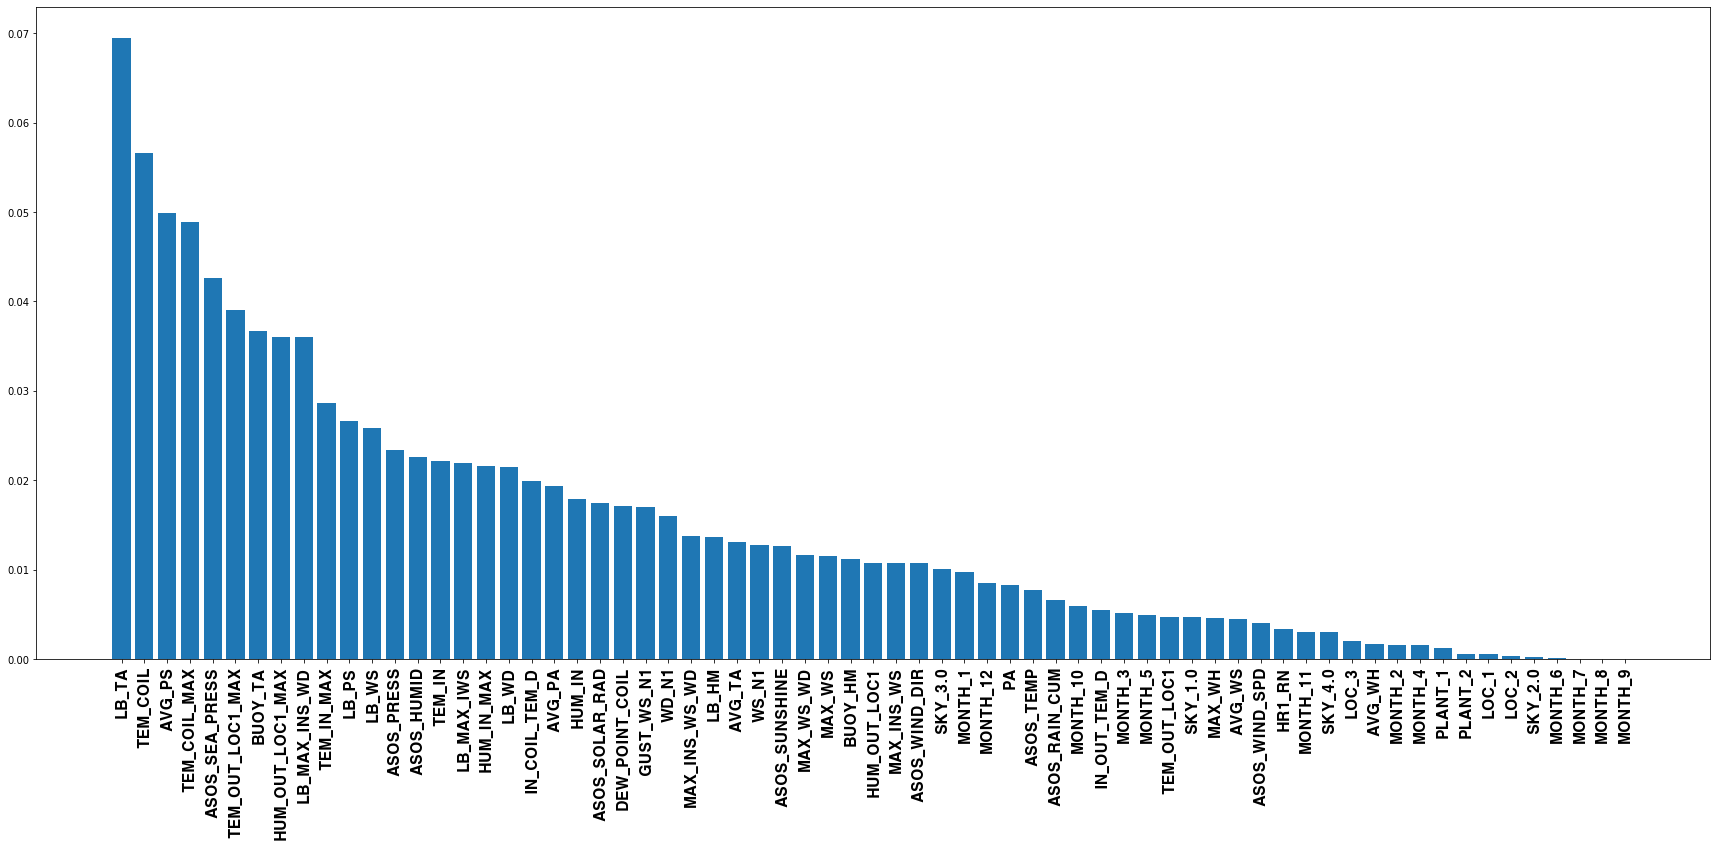

In [356]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under48_df.variable, rf_clf_under48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 검증값 만들기

In [357]:
validation = etl.makeValiation(test_data, rf_clf_under24, rf_clf_under48, test_X)
validation

C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,10,2019-04-03 00:00:00,0,0
1,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,10
2,2019-04-01 18:30:00,2,3,2019-04-02 18:30:00,0,10,2019-04-03 18:30:00,0,10
3,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,20
4,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,10,2020-03-31 11:30:00,0,10


In [358]:
etl.findCondRow(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
58,2019-04-06 18:00:00,1,3,2019-04-07 18:00:00,1,60,2019-04-08 18:00:00,0,30
126,2019-04-13 11:00:00,2,2,2019-04-14 11:00:00,1,60,2019-04-15 11:00:00,0,10
1909,2019-11-10 15:00:00,1,2,2019-11-11 15:00:00,1,60,2019-11-12 15:00:00,0,10
1933,2019-11-15 19:30:00,1,3,2019-11-16 19:30:00,1,60,2019-11-17 19:30:00,0,20
1934,2019-11-15 20:00:00,1,3,2019-11-16 20:00:00,1,60,2019-11-17 20:00:00,0,20
...,...,...,...,...,...,...,...,...,...
3277,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,90,2020-03-05 11:00:00,0,50
3337,2020-03-09 11:30:00,1,2,2020-03-10 11:30:00,1,60,2020-03-11 11:30:00,0,30
3499,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,80,2020-03-28 15:00:00,1,60
3500,2020-03-26 19:00:00,2,2,2020-03-27 19:00:00,1,90,2020-03-28 19:00:00,1,60


In [359]:
etl.findCondRow(validation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
64,2019-04-07 03:00:00,1,3,2019-04-08 03:00:00,0,40,2019-04-09 03:00:00,1,60
163,2019-04-18 04:30:00,1,3,2019-04-19 04:30:00,0,20,2019-04-20 04:30:00,1,60
169,2019-04-19 00:30:00,1,3,2019-04-20 00:30:00,0,10,2019-04-21 00:30:00,1,60
211,2019-04-23 09:30:00,2,2,2019-04-24 09:30:00,0,10,2019-04-25 09:30:00,1,60
212,2019-04-23 07:30:00,1,1,2019-04-24 07:30:00,0,10,2019-04-25 07:30:00,1,60
...,...,...,...,...,...,...,...,...,...
3333,2020-03-09 12:00:00,2,2,2020-03-10 12:00:00,0,30,2020-03-11 12:00:00,1,60
3499,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,80,2020-03-28 15:00:00,1,60
3500,2020-03-26 19:00:00,2,2,2020-03-27 19:00:00,1,90,2020-03-28 19:00:00,1,60
3506,2020-03-26 06:30:00,2,3,2020-03-27 06:30:00,0,30,2020-03-28 06:30:00,1,60


# LightGBM
## 24 시간 결로 예측

### UnderSampling

In [360]:
from lightgbm import LGBMClassifier
lgbm_clf_under24 = LGBMClassifier(n_estimators=100, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under24.fit(X_undersampled24, y_undersampled24, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled24, y_undersampled24), (X_val, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_clf_under24.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	training's auc: 0.973129	training's binary_logloss: 0.622912	valid_1's auc: 0.954607	valid_1's binary_logloss: 0.627904
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.976482	training's binary_logloss: 0.564488	valid_1's auc: 0.962435	valid_1's binary_logloss: 0.573977
[3]	training's auc: 0.977483	training's binary_logloss: 0.516072	valid_1's auc: 0.963556	valid_1's binary_logloss: 0.529969
[4]	training's auc: 0.980185	training's binary_logloss: 0.473711	valid_1's auc: 0.966343	valid_1's binary_logloss: 0.491766
[5]	training's auc: 0.98212	training's binary_logloss: 0.437301	valid_1's auc: 0.969305	valid_1's binary_logloss: 0.45941
[6]	training's auc: 0.98287	training's binary_logloss: 0.405519	valid_1's auc: 0.969541	valid_1's binary_logloss: 0.432035
[7]	training's auc: 0.986802	training's binary_logloss: 0.375308	valid_1's auc: 0.974406	valid_1's binary_logloss: 0.402923
[8]	training's auc: 0.987376	training's binary_logloss: 0.349942	valid_1'

[75]	training's auc: 1	training's binary_logloss: 0.0135258	valid_1's auc: 0.995198	valid_1's binary_logloss: 0.116807
[76]	training's auc: 1	training's binary_logloss: 0.01288	valid_1's auc: 0.995293	valid_1's binary_logloss: 0.116128
[77]	training's auc: 1	training's binary_logloss: 0.0123572	valid_1's auc: 0.995343	valid_1's binary_logloss: 0.115818
[78]	training's auc: 1	training's binary_logloss: 0.0118506	valid_1's auc: 0.995385	valid_1's binary_logloss: 0.115631
[79]	training's auc: 1	training's binary_logloss: 0.0113714	valid_1's auc: 0.995462	valid_1's binary_logloss: 0.115395
[80]	training's auc: 1	training's binary_logloss: 0.0108814	valid_1's auc: 0.995461	valid_1's binary_logloss: 0.115186
[81]	training's auc: 1	training's binary_logloss: 0.0104276	valid_1's auc: 0.99553	valid_1's binary_logloss: 0.114566
[82]	training's auc: 1	training's binary_logloss: 0.00996996	valid_1's auc: 0.995582	valid_1's binary_logloss: 0.114164
[83]	training's auc: 1	training's binary_logloss: 

In [361]:
y_pred_under24 = lgbm_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98    104202
         1.0       0.11      0.98      0.19       594

    accuracy                           0.95    104796
   macro avg       0.55      0.97      0.58    104796
weighted avg       0.99      0.95      0.97    104796



In [362]:
from sklearn.metrics import recall_score
print("LigthtGBM 24 reacall_score:",recall_score(y_val24, y_pred_under24))

LigthtGBM 24 reacall_score: 0.9797979797979798


### 변수 중요도

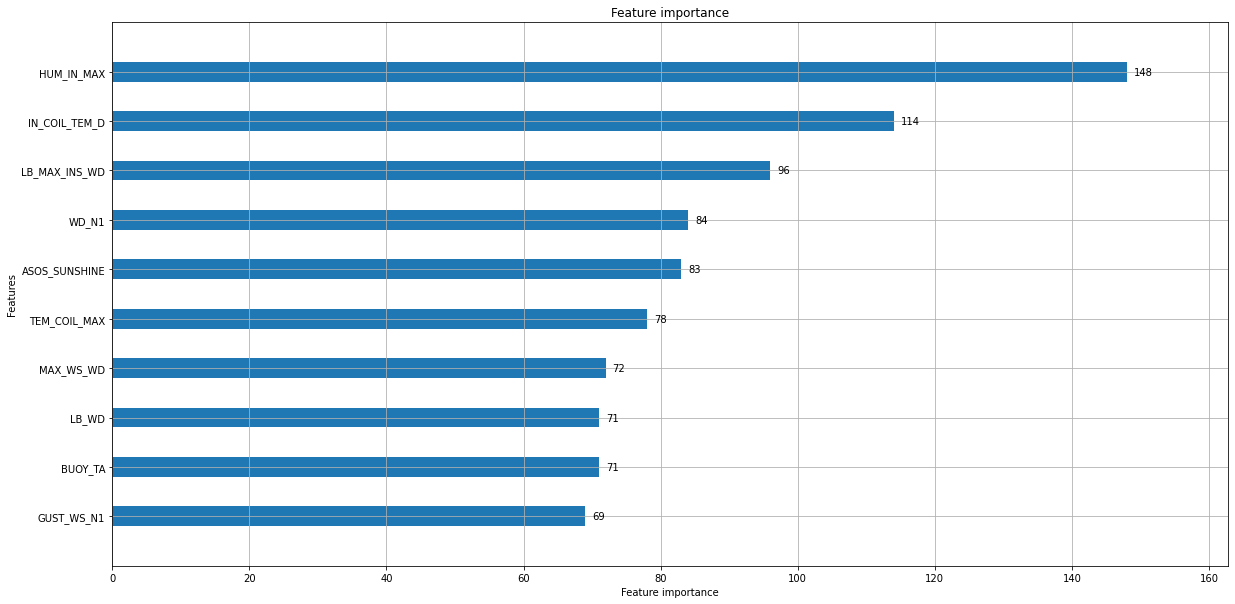

In [363]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 10))

plot_importance(lgbm_clf_under24, ax=ax,  max_num_features=10,height=0.4)

In [364]:
lgbm_model24_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_clf_under24.feature_importances_], columns=['variable', 'importance'])
lgbm_model24_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model24_df.tail(40)

,variable,importance
33,ASOS_TEMP,32
13,MAX_INS_WS,32
14,MAX_INS_WS_WD,29
11,MAX_WS,27
26,LB_MAX_IWS,24
4,TEM_OUT_LOC1,24
18,PA,23
10,AVG_WS,23
6,AVG_PA,21
7,AVG_PS,19


## 48 시간 결로 예측

### UnderSampling

In [365]:
from lightgbm import LGBMClassifier
lgbm_clf_under48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under48.fit(X_undersampled48, y_undersampled48, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled48, y_undersampled48), (X_val, y_val48)])

lgbm_roc_score = roc_auc_score(y_val48, lgbm_clf_under48.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	training's auc: 0.952632	training's binary_logloss: 0.631495	valid_1's auc: 0.933989	valid_1's binary_logloss: 0.635476
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.961755	training's binary_logloss: 0.581996	valid_1's auc: 0.943656	valid_1's binary_logloss: 0.590342
[3]	training's auc: 0.966348	training's binary_logloss: 0.538604	valid_1's auc: 0.949279	valid_1's binary_logloss: 0.550428
[4]	training's auc: 0.979257	training's binary_logloss: 0.496167	valid_1's auc: 0.963539	valid_1's binary_logloss: 0.510597
[5]	training's auc: 0.979991	training's binary_logloss: 0.462634	valid_1's auc: 0.964804	valid_1's binary_logloss: 0.480145
[6]	training's auc: 0.983309	training's binary_logloss: 0.429481	valid_1's auc: 0.971231	valid_1's binary_logloss: 0.448255
[7]	training's auc: 0.985755	training's binary_logloss: 0.400935	valid_1's auc: 0.973914	valid_1's binary_logloss: 0.421116
[8]	training's auc: 0.986058	training's binary_logloss: 0.377768	valid

[72]	training's auc: 1	training's binary_logloss: 0.0240645	valid_1's auc: 0.99441	valid_1's binary_logloss: 0.108248
[73]	training's auc: 1	training's binary_logloss: 0.0232342	valid_1's auc: 0.994442	valid_1's binary_logloss: 0.108041
[74]	training's auc: 1	training's binary_logloss: 0.0225008	valid_1's auc: 0.994423	valid_1's binary_logloss: 0.107941
[75]	training's auc: 1	training's binary_logloss: 0.0216083	valid_1's auc: 0.994438	valid_1's binary_logloss: 0.107566
[76]	training's auc: 1	training's binary_logloss: 0.0208178	valid_1's auc: 0.994476	valid_1's binary_logloss: 0.10702
[77]	training's auc: 1	training's binary_logloss: 0.0199449	valid_1's auc: 0.994567	valid_1's binary_logloss: 0.106224
[78]	training's auc: 1	training's binary_logloss: 0.0191893	valid_1's auc: 0.994626	valid_1's binary_logloss: 0.105923
[79]	training's auc: 1	training's binary_logloss: 0.0184302	valid_1's auc: 0.994727	valid_1's binary_logloss: 0.104974
[80]	training's auc: 1	training's binary_logloss: 

[147]	training's auc: 1	training's binary_logloss: 0.001561	valid_1's auc: 0.995718	valid_1's binary_logloss: 0.101745
[148]	training's auc: 1	training's binary_logloss: 0.00151315	valid_1's auc: 0.995719	valid_1's binary_logloss: 0.101893
[149]	training's auc: 1	training's binary_logloss: 0.00146233	valid_1's auc: 0.995699	valid_1's binary_logloss: 0.102205
[150]	training's auc: 1	training's binary_logloss: 0.00141102	valid_1's auc: 0.995675	valid_1's binary_logloss: 0.102373
[151]	training's auc: 1	training's binary_logloss: 0.00135242	valid_1's auc: 0.995675	valid_1's binary_logloss: 0.102436
[152]	training's auc: 1	training's binary_logloss: 0.00129728	valid_1's auc: 0.995679	valid_1's binary_logloss: 0.102403
[153]	training's auc: 1	training's binary_logloss: 0.00125048	valid_1's auc: 0.995673	valid_1's binary_logloss: 0.102494
[154]	training's auc: 1	training's binary_logloss: 0.00120822	valid_1's auc: 0.995711	valid_1's binary_logloss: 0.102472
[155]	training's auc: 1	training's

ROC AUC: 0.9955


In [366]:
y_pred_under48 = lgbm_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.14      0.98      0.24       594

    accuracy                           0.96    104796
   macro avg       0.57      0.97      0.61    104796
weighted avg       0.99      0.96      0.98    104796



In [367]:
from sklearn.metrics import recall_score
print("LigthtGBM 48 reacall_score:",recall_score(y_val48, y_pred_under48))

LigthtGBM 48 reacall_score: 0.9797979797979798


### 변수 중요도

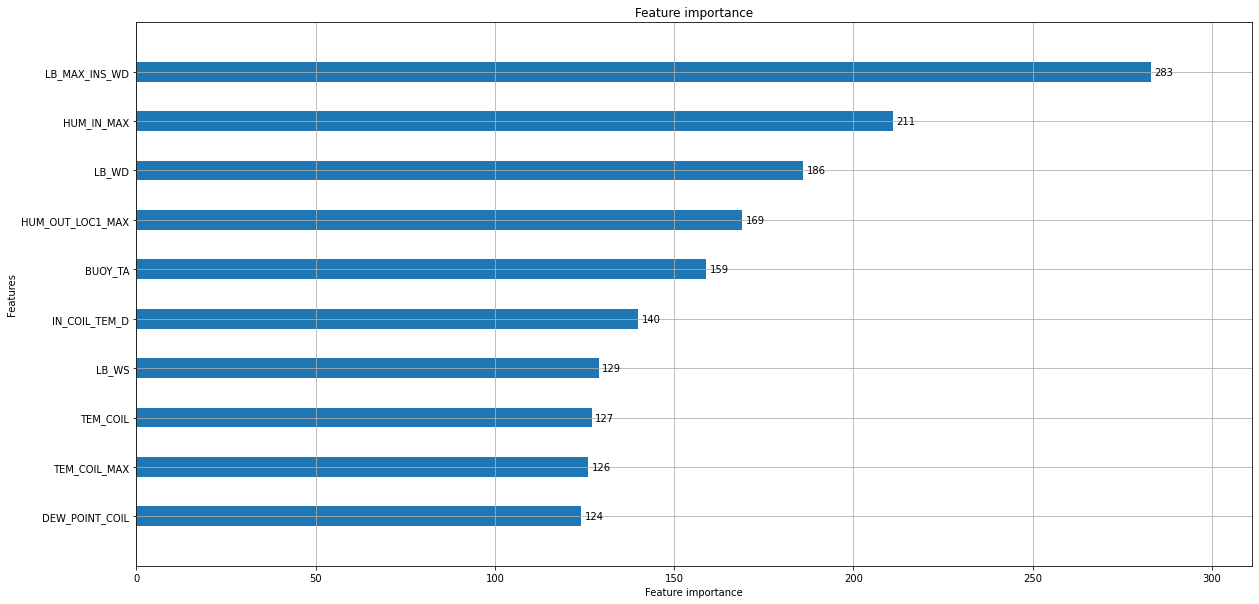

In [368]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 10))

plot_importance(lgbm_clf_under48, ax=ax,  max_num_features=10,height=0.4)

In [369]:
lgbm_model48_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_clf_under48.feature_importances_], columns=['variable', 'importance'])
lgbm_model48_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model48_df.tail(30)

,variable,importance
33,ASOS_TEMP,40
35,ASOS_WIND_SPD,37
51,MONTH_1,37
32,ASOS_RAIN_CUM,32
50,LOC_3,31
37,ASOS_SEA_PRESS,29
16,WS_N1,29
7,AVG_PS,29
46,PLANT_1,26
65,SKY_3.0,24


## 검증값 만들기

In [370]:
lgValiation =etl.makeValiation(test_data,lgbm_clf_under24,lgbm_clf_under48, test_X)
lgValiation

C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,1,2019-04-03 10:30:00,0,0
2,2019-04-01 18:30:00,2,3,2019-04-02 18:30:00,0,0,2019-04-03 18:30:00,0,0
3,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
4,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,2,2020-03-31 11:30:00,0,0


In [371]:
etl.findCondRow(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
59,2019-04-06 22:30:00,1,3,2019-04-07 22:30:00,1,58,2019-04-08 22:30:00,0,0
173,2019-04-19 14:30:00,1,2,2019-04-20 14:30:00,1,59,2019-04-21 14:30:00,0,1
456,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,59,2019-05-21 15:00:00,0,21
458,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,1,84,2019-05-21 03:30:00,0,33
459,2019-05-19 10:30:00,1,3,2019-05-20 10:30:00,1,87,2019-05-21 10:30:00,0,47
...,...,...,...,...,...,...,...,...,...
3445,2020-03-21 11:00:00,1,2,2020-03-22 11:00:00,1,56,2020-03-23 11:00:00,0,21
3489,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,89,2020-03-27 20:00:00,0,0
3492,2020-03-26 00:00:00,2,2,2020-03-27 00:00:00,1,52,2020-03-28 00:00:00,0,4
3499,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,80,2020-03-28 15:00:00,1,91


In [372]:
etl.findCondRow(lgValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
431,2019-05-16 06:00:00,1,2,2019-05-17 06:00:00,0,4,2019-05-18 06:00:00,1,62
1590,2019-09-26 08:00:00,1,3,2019-09-27 08:00:00,0,17,2019-09-28 08:00:00,1,67
1944,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,77,2019-11-17 19:00:00,1,59
2051,2019-11-22 03:30:00,1,3,2019-11-23 03:30:00,0,15,2019-11-24 03:30:00,1,57
2055,2019-11-22 07:00:00,2,1,2019-11-23 07:00:00,0,3,2019-11-24 07:00:00,1,63
...,...,...,...,...,...,...,...,...,...
3189,2020-02-22 21:00:00,1,3,2020-02-23 21:00:00,0,4,2020-02-24 21:00:00,1,59
3198,2020-02-23 23:30:00,1,3,2020-02-24 23:30:00,0,35,2020-02-25 23:30:00,1,66
3277,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,90,2020-03-05 11:00:00,1,69
3285,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,4,2020-03-05 22:30:00,1,60


In [373]:
etl.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24 시간 결로 예측

In [374]:
from xgboost import XGBClassifier

xgb_clf_under24 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_clf_under24.fit(X_undersampled24, y_undersampled24,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)


C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0]	validation_0-logloss:0.62162
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.56221
[2]	validation_0-logloss:0.51232
[3]	validation_0-logloss:0.47064
[4]	validation_0-logloss:0.43512
[5]	validation_0-logloss:0.40369
[6]	validation_0-logloss:0.37529
[7]	validation_0-logloss:0.35081
[8]	validation_0-logloss:0.32882
[9]	validation_0-logloss:0.31022
[10]	validation_0-logloss:0.29303
[11]	validation_0-logloss:0.27814
[12]	validation_0-logloss:0.26416
[13]	validation_0-logloss:0.25190
[14]	validation_0-logloss:0.24046
[15]	validation_0-logloss:0.23122
[16]	validation_0-logloss:0.22275
[17]	validation_0-logloss:0.21589
[18]	validation_0-logloss:0.20788
[19]	validation_0-logloss:0.20135
[20]	validation_0-logloss:0.19576
[21]	validation_0-logloss:0.19099
[22]	validation_0-logloss:0.18676
[23]	validation_0-logloss:0.18278
[24]	validation_0-logloss:0.17727
[25]	validation_0-logloss:0.17232
[26]	validation_0-logloss:0.16922
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [375]:
y_pred_under24 = xgb_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98    104202
         1.0       0.11      0.98      0.19       594

    accuracy                           0.95    104796
   macro avg       0.55      0.97      0.58    104796
weighted avg       0.99      0.95      0.97    104796



In [376]:
print("XGBOOST 24 reacall_score:",recall_score(y_val24, y_pred_under24))

XGBOOST 24 reacall_score: 0.9797979797979798


### 변수 중요도

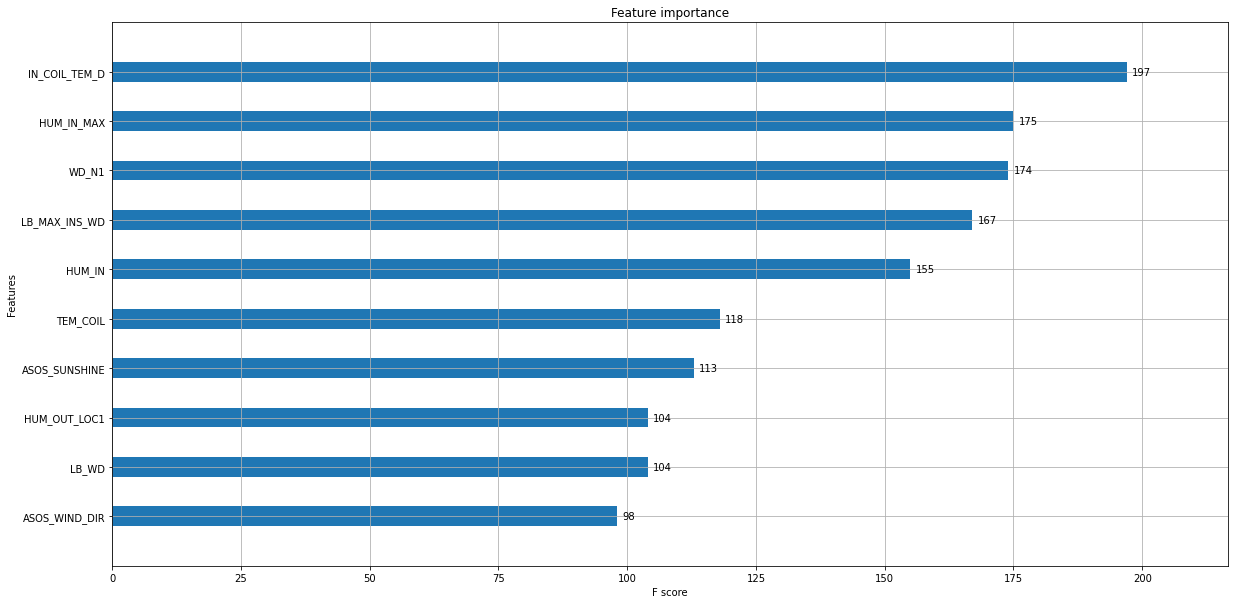

In [377]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 10))

plot_importance(xgb_clf_under24, ax=ax,  max_num_features=10,height=0.4)

In [378]:
xgb_clf_under24_df = pd.DataFrame(data=np.c_[test_X.columns.values, xgb_clf_under24.feature_importances_], columns=['variable', 'importance'])
xgb_clf_under24_df.sort_values(by="importance" ,ascending=False, inplace=True)
xgb_clf_under24_df.tail(20)

,variable,importance
27,LB_TA,0.00484415
34,ASOS_WIND_DIR,0.00479253
62,MONTH_12,0.00468883
26,LB_MAX_IWS,0.00462478
1,TEM_IN,0.0045241
64,SKY_2.0,0.00428656
45,HUM_OUT_LOC1_MAX,0.00419256
48,LOC_1,0.00410646
7,AVG_PS,0.00321935
4,TEM_OUT_LOC1,0.00310717


## 48 시간 결로 예측

In [379]:
from xgboost import XGBClassifier

xgb_clf_under48 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_clf_under48.fit(X_undersampled48, y_undersampled48,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)


[0]	validation_0-logloss:0.62195
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.56435
[2]	validation_0-logloss:0.51734
[3]	validation_0-logloss:0.47748
[4]	validation_0-logloss:0.44035
[5]	validation_0-logloss:0.41158
[6]	validation_0-logloss:0.38357
[7]	validation_0-logloss:0.35689
[8]	validation_0-logloss:0.33487
[9]	validation_0-logloss:0.31566
[10]	validation_0-logloss:0.29880
[11]	validation_0-logloss:0.28196
[12]	validation_0-logloss:0.26787
[13]	validation_0-logloss:0.25493
[14]	validation_0-logloss:0.24280
[15]	validation_0-logloss:0.23191
[16]	validation_0-logloss:0.22300
[17]	validation_0-logloss:0.21513
[18]	validation_0-logloss:0.20746
[19]	validation_0-logloss:0.20122
[20]	validation_0-logloss:0.19543
[21]	validation_0-logloss:0.19034
[22]	validation_0-logloss:0.18620
[23]	validation_0-logloss:0.18152
[24]	validation_0-logloss:0.17771
[25]	validation_0-logloss:0.17330
[26]	validation_0-logloss:0.17054
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [380]:
y_pred_under48 = xgb_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.14      0.98      0.24       594

    accuracy                           0.96    104796
   macro avg       0.57      0.97      0.61    104796
weighted avg       0.99      0.96      0.98    104796



In [381]:
print("XGBOOST 48 reacall_score:",recall_score(y_val48, y_pred_under48))

XGBOOST 48 reacall_score: 0.9814814814814815


### 변수 중요도

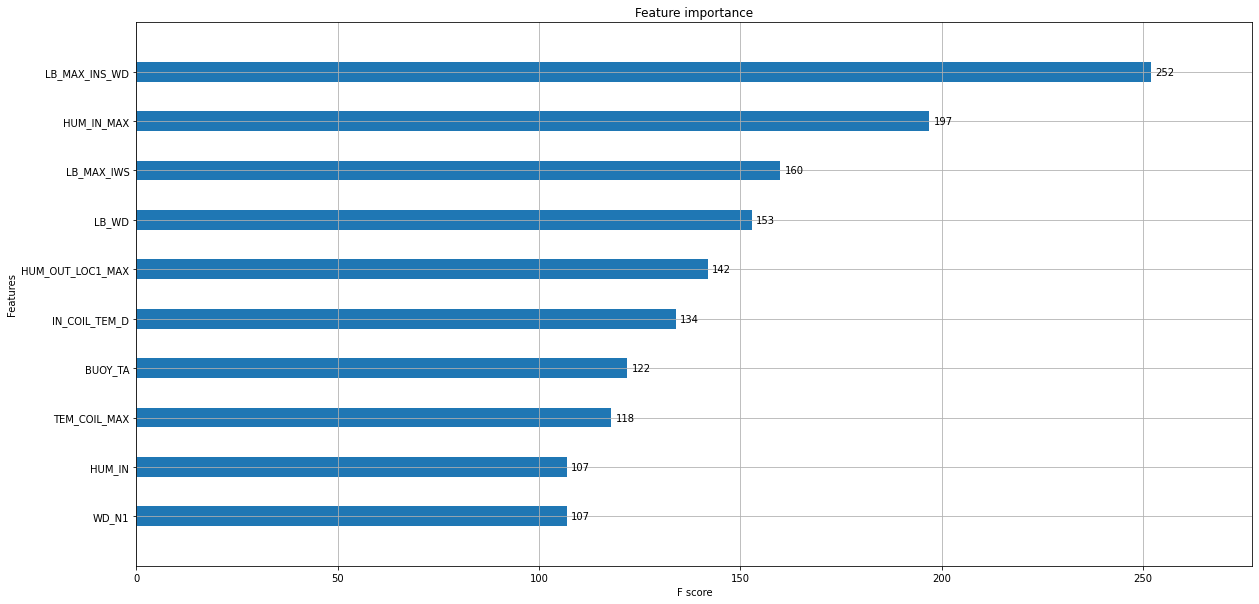

In [382]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 10))

plot_importance(xgb_clf_under48, ax=ax,  max_num_features=10,height=0.4)

In [383]:
xgb_clf_under48_df = pd.DataFrame(data=np.c_[test_X.columns.values, xgb_clf_under48.feature_importances_], columns=['variable', 'importance'])
xgb_clf_under48_df.sort_values(by="importance" ,ascending=False, inplace=True)
xgb_clf_under48_df.tail(20)

,variable,importance
46,PLANT_1,0.00610982
16,WS_N1,0.0060226
14,MAX_INS_WS_WD,0.0059218
34,ASOS_WIND_DIR,0.00545005
12,MAX_WS_WD,0.00503096
50,LOC_3,0.00481055
22,AVG_WH,0.00429454
66,SKY_4.0,0.00379469
0,IN_OUT_TEM_D,0.00343287
35,ASOS_WIND_SPD,0.00339774


## 검증 값 만들기

In [384]:
xgValiation= etl.makeValiation(test_data, xgb_clf_under24, xgb_clf_under48, test_X)
xgValiation

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,1
1,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,2
2,2019-04-01 18:30:00,2,3,2019-04-02 18:30:00,0,0,2019-04-03 18:30:00,0,0
3,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
4,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,1
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [385]:
etl.findCondRow(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
60,2019-04-06 21:00:00,2,1,2019-04-07 21:00:00,1,57,2019-04-08 21:00:00,0,0
62,2019-04-07 02:30:00,2,2,2019-04-08 02:30:00,1,56,2019-04-09 02:30:00,0,1
65,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,1,86,2019-04-09 03:00:00,0,2
456,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,60,2019-05-21 15:00:00,0,7
458,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,1,76,2019-05-21 03:30:00,0,6
...,...,...,...,...,...,...,...,...,...
3489,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,92,2020-03-27 20:00:00,0,1
3492,2020-03-26 00:00:00,2,2,2020-03-27 00:00:00,1,69,2020-03-28 00:00:00,0,1
3498,2020-03-26 03:00:00,2,2,2020-03-27 03:00:00,1,57,2020-03-28 03:00:00,0,5
3499,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,97,2020-03-28 15:00:00,1,81


In [386]:
etl.findCondRow(xgValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
172,2019-04-19 04:30:00,1,2,2019-04-20 04:30:00,0,9,2019-04-21 04:30:00,1,89
190,2019-04-21 02:30:00,2,1,2019-04-22 02:30:00,0,1,2019-04-23 02:30:00,1,71
192,2019-04-21 05:30:00,1,3,2019-04-22 05:30:00,0,0,2019-04-23 05:30:00,1,82
218,2019-04-24 10:00:00,2,1,2019-04-25 10:00:00,0,3,2019-04-26 10:00:00,1,76
277,2019-04-30 06:30:00,1,3,2019-05-01 06:30:00,0,1,2019-05-02 06:30:00,1,84
...,...,...,...,...,...,...,...,...,...
3279,2020-03-03 23:00:00,2,1,2020-03-04 23:00:00,0,0,2020-03-05 23:00:00,1,58
3285,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,0,2020-03-05 22:30:00,1,61
3368,2020-03-12 21:00:00,1,1,2020-03-13 21:00:00,0,14,2020-03-14 21:00:00,1,64
3499,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,97,2020-03-28 15:00:00,1,81


In [387]:
etl.save_validation_csv(xgValiation,"xgboost")

# SVM

## 24시간 결로 예측

In [388]:
from sklearn.svm import SVC
svm_under24_clf = SVC(random_state=42,probability=True)
svm_under24_clf.fit(X_undersampled24, y_undersampled24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=42)

In [389]:
from sklearn.metrics import recall_score
print("SVM 24 reacall_score:",recall_score(y_val24, y_pred_under24))

SVM 24 reacall_score: 0.9797979797979798


In [390]:
y_pred_under24 = svm_under24_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    104202
         1.0       0.07      0.98      0.14       594

    accuracy                           0.93    104796
   macro avg       0.54      0.95      0.55    104796
weighted avg       0.99      0.93      0.96    104796



## 하이퍼 파라미터 값 도출하기

In [391]:
# from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
# param_grid = {"C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                "gamma" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=kfold, iid=True).fit(X_undersampled24, y_undersampled24)
# print('학습결과', grid_search.score(X_undersampled24, y_undersampled24))
# print('테스트결과', grid_search.score(X_val, y_val24 ))
# print('최적의 하이퍼 파라미터', grid_search.best_params_)
# print('최적 모델의 교차검증 스코어', grid_search.best_score_)
# print('최적 모델', grid_search.best_estimator_)

In [392]:
# print('최적의 하이퍼 파라미터', grid_search.best_params_)
# print('최적 모델의 교차검증 스코어', grid_search.best_score_)
# print('최적 모델', grid_search.best_estimator_)

In [393]:
# print('테스트결과', grid_search.score(X_val, y_val24 ))

## 48시간 결로 예측

In [394]:
from sklearn.svm import SVC
svm_under48_clf = SVC(random_state=42,probability=True,)
svm_under48_clf.fit(X_undersampled48, y_undersampled48)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=42)

In [395]:
print("SVM 48 reacall_score:",recall_score(y_val48, y_pred_under48))

SVM 48 reacall_score: 0.9814814814814815


In [396]:
y_pred_under48 = svm_under48_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95    104202
         1.0       0.06      0.95      0.11       594

    accuracy                           0.91    104796
   macro avg       0.53      0.93      0.53    104796
weighted avg       0.99      0.91      0.95    104796



## 하이퍼 파라미터 축출

In [397]:
# from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
# param_grid = {"C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                "gamma" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=kfold, iid=True).fit(X_undersampled48, y_undersampled48)
# print('학습결과', grid_search.score(X_undersampled48, y_undersampled48))
# print('테스트결과', grid_search.score(X_val, y_val48 ))
# print('최적의 하이퍼 파라미터', grid_search.best_params_)
# print('최적 모델의 교차검증 스코어', grid_search.best_score_)
# print('최적 모델', grid_search.best_estimator_)

In [398]:
# from sklearn.svm import SVC
# svm_under48_clf = SVC(random_state=42,probability=True, C=10,gamma=0.1)
# svm_under48_clf.fit(X_undersampled48, y_undersampled48)

In [399]:
# y_pred_under48 = svm_under48_clf.predict(X_val)
# from sklearn.metrics import classification_report
# print(classification_report(y_val48, y_pred_under48))

## 검증값 만들기

In [400]:
svValiation= etl.makeValiation(test_data, svm_under24_clf, svm_under48_clf, test_X)
svValiation

C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,10
1,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,1
2,2019-04-01 18:30:00,2,3,2019-04-02 18:30:00,0,0,2019-04-03 18:30:00,0,0
3,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,10
4,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,1
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,1
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,35
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,1,2020-03-31 11:30:00,0,12


In [401]:
etl.findCondRow(svValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
60,2019-04-06 21:00:00,2,1,2019-04-07 21:00:00,1,44,2019-04-08 21:00:00,0,0
65,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,1,60,2019-04-09 03:00:00,1,46
170,2019-04-19 08:30:00,1,3,2019-04-20 08:30:00,1,40,2019-04-21 08:30:00,0,32
173,2019-04-19 14:30:00,1,2,2019-04-20 14:30:00,1,87,2019-04-21 14:30:00,1,76
174,2019-04-19 13:30:00,1,1,2019-04-20 13:30:00,1,45,2019-04-21 13:30:00,0,36
...,...,...,...,...,...,...,...,...,...
3498,2020-03-26 03:00:00,2,2,2020-03-27 03:00:00,1,60,2020-03-28 03:00:00,1,88
3499,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,86,2020-03-28 15:00:00,1,89
3500,2020-03-26 19:00:00,2,2,2020-03-27 19:00:00,1,97,2020-03-28 19:00:00,0,42
3508,2020-03-26 20:00:00,2,3,2020-03-27 20:00:00,1,74,2020-03-28 20:00:00,0,30


In [402]:
etl.findCondRow(svValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
23,2019-04-03 07:00:00,2,1,2019-04-04 07:00:00,0,19,2019-04-05 07:00:00,1,45
65,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,1,60,2019-04-09 03:00:00,1,46
173,2019-04-19 14:30:00,1,2,2019-04-20 14:30:00,1,87,2019-04-21 14:30:00,1,76
177,2019-04-20 00:00:00,2,2,2019-04-21 00:00:00,0,13,2019-04-22 00:00:00,1,47
211,2019-04-23 09:30:00,2,2,2019-04-24 09:30:00,0,13,2019-04-25 09:30:00,1,43
...,...,...,...,...,...,...,...,...,...
3504,2020-03-26 04:00:00,2,1,2020-03-27 04:00:00,0,17,2020-03-28 04:00:00,1,57
3505,2020-03-26 03:30:00,2,3,2020-03-27 03:30:00,0,15,2020-03-28 03:30:00,1,51
3506,2020-03-26 06:30:00,2,3,2020-03-27 06:30:00,0,5,2020-03-28 06:30:00,1,53
3507,2020-03-26 07:30:00,2,3,2020-03-27 07:30:00,0,13,2020-03-28 07:30:00,1,62


In [403]:
etl.save_validation_csv(svValiation,"svn")

# CatBoost

## 24 시간 결로 예측

In [404]:
from catboost import CatBoostClassifier
cat_under24_clf = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC',depth=5)
# train the model
cat_under24_clf.fit(X_undersampled24, y_undersampled24)

0:	total: 4.4ms	remaining: 4.4s
1:	total: 7.83ms	remaining: 3.91s
2:	total: 11.3ms	remaining: 3.74s
3:	total: 15.3ms	remaining: 3.8s
4:	total: 18.6ms	remaining: 3.7s
5:	total: 22.3ms	remaining: 3.69s
6:	total: 25.7ms	remaining: 3.64s
7:	total: 29.6ms	remaining: 3.67s
8:	total: 33.3ms	remaining: 3.66s
9:	total: 37ms	remaining: 3.66s
10:	total: 40.4ms	remaining: 3.63s
11:	total: 44ms	remaining: 3.63s
12:	total: 47.8ms	remaining: 3.63s
13:	total: 51.6ms	remaining: 3.63s
14:	total: 55.1ms	remaining: 3.62s
15:	total: 58.5ms	remaining: 3.6s
16:	total: 62.2ms	remaining: 3.6s
17:	total: 66.3ms	remaining: 3.62s
18:	total: 69.7ms	remaining: 3.6s
19:	total: 73.3ms	remaining: 3.59s
20:	total: 77.6ms	remaining: 3.62s
21:	total: 81.9ms	remaining: 3.64s
22:	total: 86.3ms	remaining: 3.67s
23:	total: 90.9ms	remaining: 3.7s
24:	total: 95.9ms	remaining: 3.74s
25:	total: 99.3ms	remaining: 3.72s
26:	total: 103ms	remaining: 3.7s
27:	total: 106ms	remaining: 3.68s
28:	total: 109ms	remaining: 3.66s
29:	total: 

249:	total: 885ms	remaining: 2.65s
250:	total: 889ms	remaining: 2.65s
251:	total: 892ms	remaining: 2.65s
252:	total: 896ms	remaining: 2.64s
253:	total: 899ms	remaining: 2.64s
254:	total: 903ms	remaining: 2.64s
255:	total: 906ms	remaining: 2.63s
256:	total: 910ms	remaining: 2.63s
257:	total: 913ms	remaining: 2.63s
258:	total: 916ms	remaining: 2.62s
259:	total: 919ms	remaining: 2.62s
260:	total: 923ms	remaining: 2.61s
261:	total: 926ms	remaining: 2.61s
262:	total: 930ms	remaining: 2.6s
263:	total: 933ms	remaining: 2.6s
264:	total: 936ms	remaining: 2.6s
265:	total: 940ms	remaining: 2.59s
266:	total: 943ms	remaining: 2.59s
267:	total: 947ms	remaining: 2.59s
268:	total: 950ms	remaining: 2.58s
269:	total: 954ms	remaining: 2.58s
270:	total: 957ms	remaining: 2.57s
271:	total: 960ms	remaining: 2.57s
272:	total: 964ms	remaining: 2.56s
273:	total: 967ms	remaining: 2.56s
274:	total: 970ms	remaining: 2.56s
275:	total: 974ms	remaining: 2.55s
276:	total: 977ms	remaining: 2.55s
277:	total: 980ms	remai

498:	total: 1.77s	remaining: 1.78s
499:	total: 1.77s	remaining: 1.77s
500:	total: 1.78s	remaining: 1.77s
501:	total: 1.78s	remaining: 1.77s
502:	total: 1.78s	remaining: 1.76s
503:	total: 1.79s	remaining: 1.76s
504:	total: 1.79s	remaining: 1.75s
505:	total: 1.79s	remaining: 1.75s
506:	total: 1.8s	remaining: 1.75s
507:	total: 1.8s	remaining: 1.74s
508:	total: 1.8s	remaining: 1.74s
509:	total: 1.81s	remaining: 1.74s
510:	total: 1.81s	remaining: 1.73s
511:	total: 1.81s	remaining: 1.73s
512:	total: 1.82s	remaining: 1.72s
513:	total: 1.82s	remaining: 1.72s
514:	total: 1.82s	remaining: 1.72s
515:	total: 1.83s	remaining: 1.71s
516:	total: 1.83s	remaining: 1.71s
517:	total: 1.83s	remaining: 1.71s
518:	total: 1.84s	remaining: 1.7s
519:	total: 1.84s	remaining: 1.7s
520:	total: 1.84s	remaining: 1.69s
521:	total: 1.85s	remaining: 1.69s
522:	total: 1.85s	remaining: 1.69s
523:	total: 1.85s	remaining: 1.68s
524:	total: 1.86s	remaining: 1.68s
525:	total: 1.86s	remaining: 1.68s
526:	total: 1.86s	remaini

750:	total: 2.66s	remaining: 882ms
751:	total: 2.66s	remaining: 878ms
752:	total: 2.67s	remaining: 875ms
753:	total: 2.67s	remaining: 871ms
754:	total: 2.67s	remaining: 868ms
755:	total: 2.68s	remaining: 864ms
756:	total: 2.68s	remaining: 860ms
757:	total: 2.68s	remaining: 857ms
758:	total: 2.69s	remaining: 853ms
759:	total: 2.69s	remaining: 850ms
760:	total: 2.69s	remaining: 846ms
761:	total: 2.7s	remaining: 842ms
762:	total: 2.7s	remaining: 839ms
763:	total: 2.7s	remaining: 835ms
764:	total: 2.71s	remaining: 832ms
765:	total: 2.71s	remaining: 828ms
766:	total: 2.71s	remaining: 825ms
767:	total: 2.72s	remaining: 821ms
768:	total: 2.72s	remaining: 817ms
769:	total: 2.72s	remaining: 814ms
770:	total: 2.73s	remaining: 810ms
771:	total: 2.73s	remaining: 806ms
772:	total: 2.73s	remaining: 803ms
773:	total: 2.74s	remaining: 799ms
774:	total: 2.74s	remaining: 796ms
775:	total: 2.74s	remaining: 792ms
776:	total: 2.75s	remaining: 788ms
777:	total: 2.75s	remaining: 785ms
778:	total: 2.75s	remai

995:	total: 3.52s	remaining: 14.2ms
996:	total: 3.53s	remaining: 10.6ms
997:	total: 3.54s	remaining: 7.09ms
998:	total: 3.54s	remaining: 3.55ms
999:	total: 3.55s	remaining: 0us


In [405]:
y_pred_under24 = cat_under24_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.12      0.98      0.22       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.60    104796
weighted avg       0.99      0.96      0.98    104796



In [406]:
rf_clf_under24_df = pd.DataFrame(data=np.c_[train_X.columns.values, cat_under24_clf.feature_importances_], columns=['variable', 'importance'])
rf_clf_under24_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under24_df.tail(20)

,variable,importance
35,ASOS_WIND_SPD,0.449263
16,WS_N1,0.439806
11,MAX_WS,0.433277
61,MONTH_11,0.401757
47,PLANT_2,0.305947
62,MONTH_12,0.254763
50,LOC_3,0.238334
52,MONTH_2,0.213443
21,MAX_WH,0.206008
53,MONTH_3,0.205213


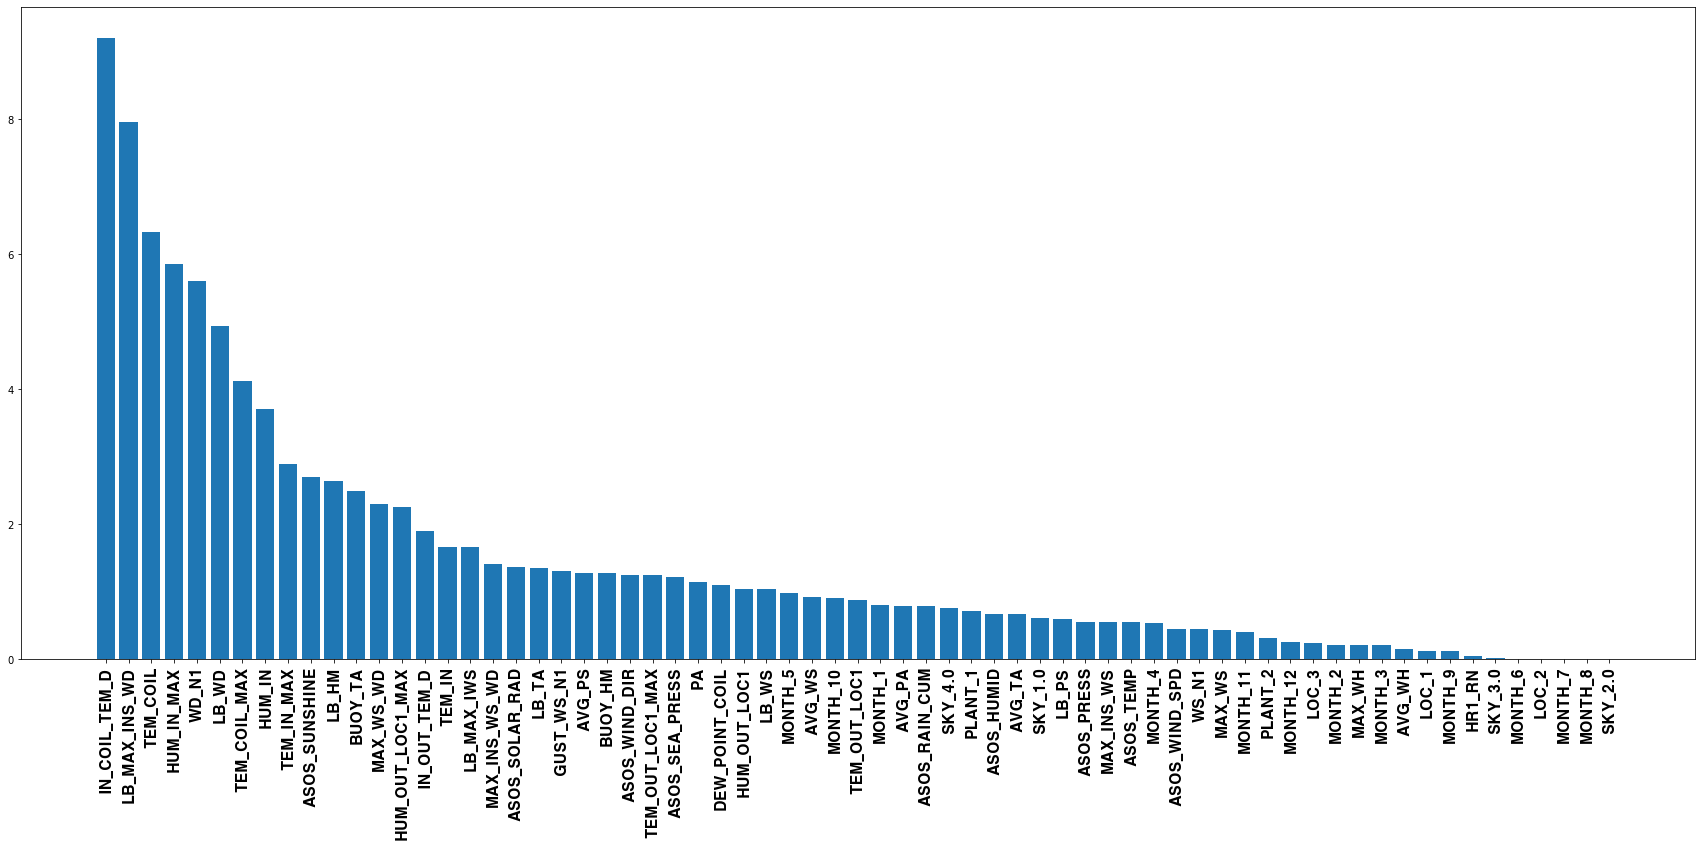

In [407]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48 시간 결로 예측

In [408]:
from catboost import CatBoostClassifier
cat_under48_clf = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC',depth=5)
# train the model
cat_under48_clf.fit(X_undersampled48, y_undersampled48)

0:	total: 4.65ms	remaining: 4.64s
1:	total: 8.11ms	remaining: 4.05s
2:	total: 11.5ms	remaining: 3.82s
3:	total: 15.3ms	remaining: 3.82s
4:	total: 18.7ms	remaining: 3.73s
5:	total: 22.5ms	remaining: 3.72s
6:	total: 25.8ms	remaining: 3.67s
7:	total: 29.4ms	remaining: 3.65s
8:	total: 33.4ms	remaining: 3.68s
9:	total: 37.5ms	remaining: 3.72s
10:	total: 40.9ms	remaining: 3.67s
11:	total: 44.2ms	remaining: 3.64s
12:	total: 47.4ms	remaining: 3.6s
13:	total: 50.8ms	remaining: 3.58s
14:	total: 53.9ms	remaining: 3.54s
15:	total: 57.3ms	remaining: 3.53s
16:	total: 60.6ms	remaining: 3.5s
17:	total: 64.1ms	remaining: 3.5s
18:	total: 68.2ms	remaining: 3.52s
19:	total: 71.7ms	remaining: 3.51s
20:	total: 75.1ms	remaining: 3.5s
21:	total: 78.6ms	remaining: 3.49s
22:	total: 82.2ms	remaining: 3.49s
23:	total: 85.4ms	remaining: 3.47s
24:	total: 89ms	remaining: 3.47s
25:	total: 92.5ms	remaining: 3.46s
26:	total: 96.2ms	remaining: 3.47s
27:	total: 99.6ms	remaining: 3.46s
28:	total: 103ms	remaining: 3.45s
29

259:	total: 891ms	remaining: 2.54s
260:	total: 895ms	remaining: 2.53s
261:	total: 898ms	remaining: 2.53s
262:	total: 902ms	remaining: 2.53s
263:	total: 905ms	remaining: 2.52s
264:	total: 908ms	remaining: 2.52s
265:	total: 912ms	remaining: 2.52s
266:	total: 916ms	remaining: 2.51s
267:	total: 919ms	remaining: 2.51s
268:	total: 922ms	remaining: 2.5s
269:	total: 925ms	remaining: 2.5s
270:	total: 929ms	remaining: 2.5s
271:	total: 932ms	remaining: 2.49s
272:	total: 935ms	remaining: 2.49s
273:	total: 938ms	remaining: 2.48s
274:	total: 942ms	remaining: 2.48s
275:	total: 945ms	remaining: 2.48s
276:	total: 948ms	remaining: 2.47s
277:	total: 952ms	remaining: 2.47s
278:	total: 955ms	remaining: 2.47s
279:	total: 958ms	remaining: 2.46s
280:	total: 961ms	remaining: 2.46s
281:	total: 964ms	remaining: 2.46s
282:	total: 968ms	remaining: 2.45s
283:	total: 971ms	remaining: 2.45s
284:	total: 974ms	remaining: 2.44s
285:	total: 978ms	remaining: 2.44s
286:	total: 981ms	remaining: 2.44s
287:	total: 984ms	remai

507:	total: 1.77s	remaining: 1.71s
508:	total: 1.77s	remaining: 1.71s
509:	total: 1.78s	remaining: 1.71s
510:	total: 1.78s	remaining: 1.71s
511:	total: 1.79s	remaining: 1.7s
512:	total: 1.79s	remaining: 1.7s
513:	total: 1.79s	remaining: 1.7s
514:	total: 1.8s	remaining: 1.69s
515:	total: 1.8s	remaining: 1.69s
516:	total: 1.8s	remaining: 1.68s
517:	total: 1.81s	remaining: 1.68s
518:	total: 1.81s	remaining: 1.68s
519:	total: 1.81s	remaining: 1.67s
520:	total: 1.82s	remaining: 1.67s
521:	total: 1.82s	remaining: 1.67s
522:	total: 1.82s	remaining: 1.66s
523:	total: 1.83s	remaining: 1.66s
524:	total: 1.83s	remaining: 1.66s
525:	total: 1.83s	remaining: 1.65s
526:	total: 1.83s	remaining: 1.65s
527:	total: 1.84s	remaining: 1.64s
528:	total: 1.84s	remaining: 1.64s
529:	total: 1.84s	remaining: 1.64s
530:	total: 1.85s	remaining: 1.63s
531:	total: 1.85s	remaining: 1.63s
532:	total: 1.85s	remaining: 1.63s
533:	total: 1.86s	remaining: 1.62s
534:	total: 1.86s	remaining: 1.62s
535:	total: 1.86s	remainin

765:	total: 2.65s	remaining: 809ms
766:	total: 2.65s	remaining: 805ms
767:	total: 2.65s	remaining: 802ms
768:	total: 2.66s	remaining: 798ms
769:	total: 2.66s	remaining: 795ms
770:	total: 2.66s	remaining: 791ms
771:	total: 2.67s	remaining: 788ms
772:	total: 2.67s	remaining: 784ms
773:	total: 2.67s	remaining: 781ms
774:	total: 2.68s	remaining: 777ms
775:	total: 2.68s	remaining: 773ms
776:	total: 2.68s	remaining: 770ms
777:	total: 2.69s	remaining: 766ms
778:	total: 2.69s	remaining: 763ms
779:	total: 2.69s	remaining: 759ms
780:	total: 2.7s	remaining: 756ms
781:	total: 2.7s	remaining: 752ms
782:	total: 2.7s	remaining: 749ms
783:	total: 2.71s	remaining: 745ms
784:	total: 2.71s	remaining: 742ms
785:	total: 2.71s	remaining: 738ms
786:	total: 2.71s	remaining: 735ms
787:	total: 2.72s	remaining: 731ms
788:	total: 2.72s	remaining: 728ms
789:	total: 2.72s	remaining: 724ms
790:	total: 2.73s	remaining: 721ms
791:	total: 2.73s	remaining: 717ms
792:	total: 2.73s	remaining: 714ms
793:	total: 2.74s	remai

In [409]:
y_pred_under48 = cat_under48_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.13      0.98      0.23       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.60    104796
weighted avg       0.99      0.96      0.98    104796



In [410]:
rf_clf_under48_df = pd.DataFrame(data=np.c_[train_X.columns.values, cat_under48_clf.feature_importances_], columns=['variable', 'importance'])
rf_clf_under48_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under48_df.tail(20)

,variable,importance
16,WS_N1,0.408255
61,MONTH_11,0.331925
54,MONTH_4,0.330093
21,MAX_WH,0.328071
60,MONTH_10,0.316402
13,MAX_INS_WS,0.305401
17,GUST_WS_N1,0.301619
22,AVG_WH,0.299629
5,HUM_OUT_LOC1,0.241603
0,IN_OUT_TEM_D,0.199903


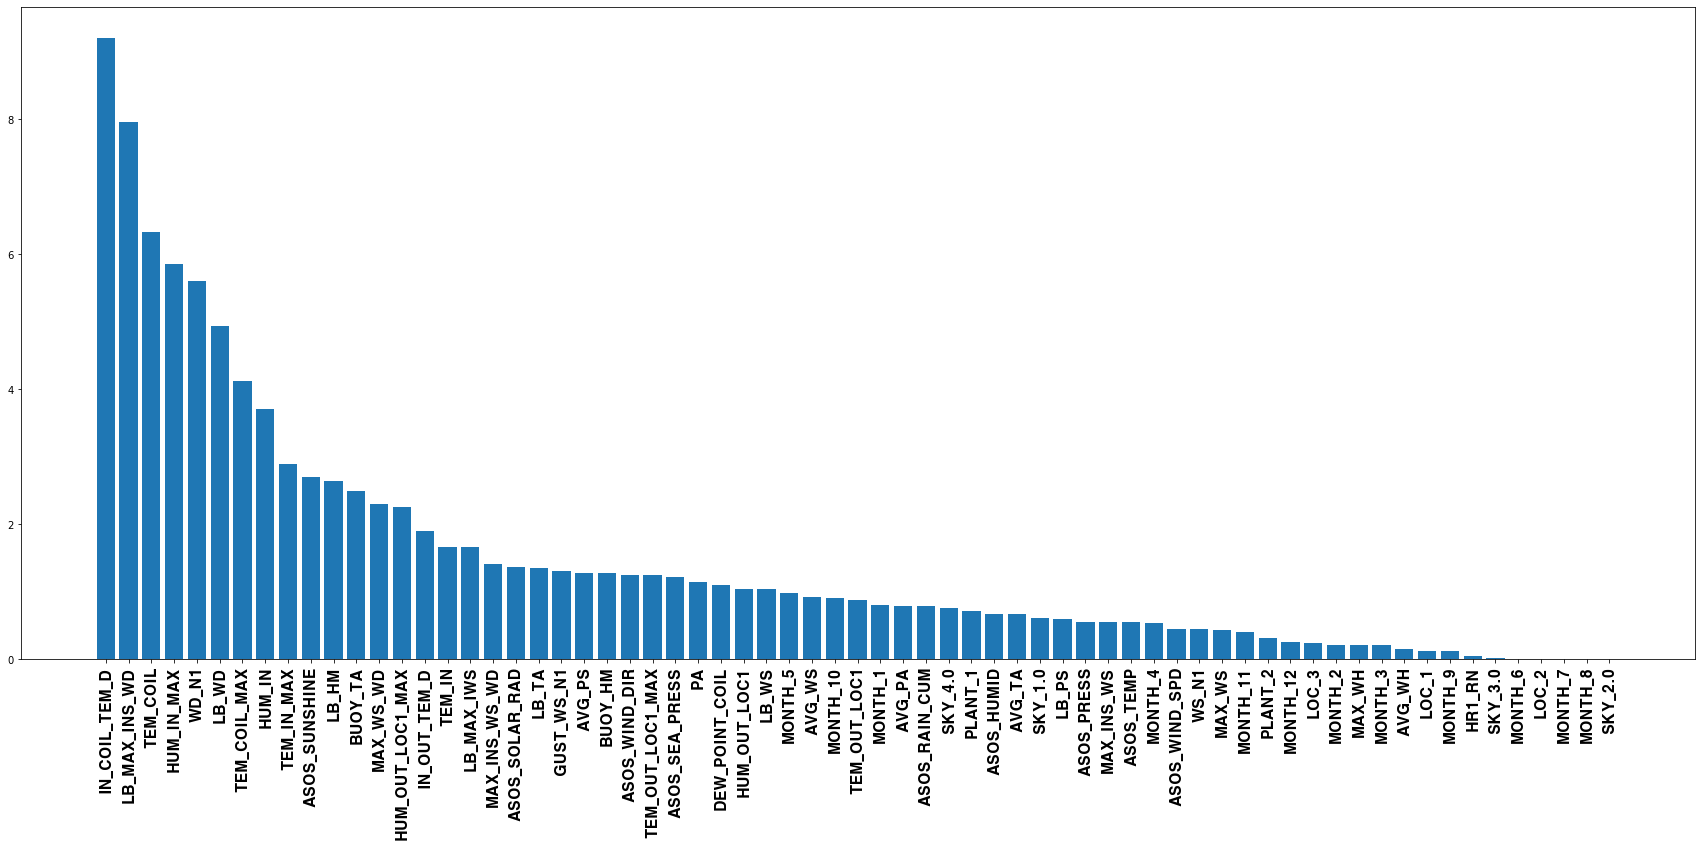

In [411]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [412]:
catValiation=etl.makeValiation(test_data,cat_under24_clf,cat_under48_clf,test_X)

In [413]:
etl.findCondRow(catValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
53,2019-04-06 17:00:00,1,1,2019-04-07 17:00:00,1,54,2019-04-08 17:00:00,0,0
58,2019-04-06 18:00:00,1,3,2019-04-07 18:00:00,1,63,2019-04-08 18:00:00,0,0
60,2019-04-06 21:00:00,2,1,2019-04-07 21:00:00,1,66,2019-04-08 21:00:00,0,0
65,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,1,61,2019-04-09 03:00:00,0,14
456,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,81,2019-05-21 15:00:00,0,9
...,...,...,...,...,...,...,...,...,...
3445,2020-03-21 11:00:00,1,2,2020-03-22 11:00:00,1,57,2020-03-23 11:00:00,0,8
3489,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,80,2020-03-27 20:00:00,0,3
3492,2020-03-26 00:00:00,2,2,2020-03-27 00:00:00,1,53,2020-03-28 00:00:00,0,27
3499,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,86,2020-03-28 15:00:00,1,89


In [414]:
etl.findCondRow(catValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1980,2019-11-16 23:30:00,1,3,2019-11-17 23:30:00,1,63,2019-11-18 23:30:00,1,55
2073,2019-11-23 00:30:00,2,2,2019-11-24 00:30:00,0,7,2019-11-25 00:30:00,1,57
2080,2019-11-23 04:30:00,2,1,2019-11-24 04:30:00,1,81,2019-11-25 04:30:00,1,88
2081,2019-11-23 05:30:00,2,1,2019-11-24 05:30:00,1,81,2019-11-25 05:30:00,1,87
2082,2019-11-23 10:00:00,2,1,2019-11-24 10:00:00,1,92,2019-11-25 10:00:00,1,86
...,...,...,...,...,...,...,...,...,...
3277,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,88,2020-03-05 11:00:00,1,76
3279,2020-03-03 23:00:00,2,1,2020-03-04 23:00:00,0,1,2020-03-05 23:00:00,1,52
3284,2020-03-03 18:30:00,1,3,2020-03-04 18:30:00,0,0,2020-03-05 18:30:00,1,52
3285,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,2,2020-03-05 22:30:00,1,54


In [415]:
etl.save_validation_csv(catValiation,"cat")

# Ensemble xgb, svn, lgb

In [416]:
from sklearn.ensemble import VotingClassifier
voting_model24 = VotingClassifier(estimators=[('xgb', xgb_clf_under24), ('svn', svm_under24_clf), ('lgb', lgbm_clf_under24)], voting='soft')
voting_model24.fit(X_undersampled24, y_undersampled24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster=None,
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=10, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            random_state=42, reg_alpha=0,
                                    

In [417]:
y_pred24 = voting_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.11      0.98      0.20       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.59    104796
weighted avg       0.99      0.96      0.97    104796



In [418]:
from sklearn.ensemble import VotingClassifier
voting_model48 = VotingClassifier(estimators=[('xgb', xgb_clf_under48), ('svn', svm_under48_clf), ('lgb', lgbm_clf_under48)],voting='soft')
voting_model48.fit(X_undersampled48, y_undersampled48)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster=None,
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=10, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            random_state=42, reg_alpha=0,
                                    

In [419]:
y_pred48 = voting_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.15      0.98      0.25       594

    accuracy                           0.97    104796
   macro avg       0.57      0.97      0.62    104796
weighted avg       1.00      0.97      0.98    104796



In [420]:
vtValiation = etl.makeValiation(test_data,voting_model24, voting_model48, test_X)

C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [421]:
etl.findCondRow(vtValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
65,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,1,67,2019-04-09 03:00:00,0,15
456,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,64,2019-05-21 15:00:00,0,10
458,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,1,66,2019-05-21 03:30:00,0,12
459,2019-05-19 10:30:00,1,3,2019-05-20 10:30:00,1,68,2019-05-21 10:30:00,0,18
460,2019-05-19 16:30:00,1,3,2019-05-20 16:30:00,1,83,2019-05-21 16:30:00,0,13
...,...,...,...,...,...,...,...,...,...
3445,2020-03-21 11:00:00,1,2,2020-03-22 11:00:00,1,61,2020-03-23 11:00:00,0,13
3489,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,81,2020-03-27 20:00:00,0,1
3492,2020-03-26 00:00:00,2,2,2020-03-27 00:00:00,1,63,2020-03-28 00:00:00,0,17
3499,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,88,2020-03-28 15:00:00,1,90


In [422]:
etl.findCondRow(vtValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1944,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,72,2019-11-17 19:00:00,1,62
2080,2019-11-23 04:30:00,2,1,2019-11-24 04:30:00,1,81,2019-11-25 04:30:00,1,87
2081,2019-11-23 05:30:00,2,1,2019-11-24 05:30:00,1,87,2019-11-25 05:30:00,1,90
2082,2019-11-23 10:00:00,2,1,2019-11-24 10:00:00,1,93,2019-11-25 10:00:00,1,77
2141,2019-12-01 00:00:00,2,3,2019-12-02 00:00:00,0,10,2019-12-03 00:00:00,1,66
...,...,...,...,...,...,...,...,...,...
3197,2020-02-23 13:30:00,1,3,2020-02-24 13:30:00,0,0,2020-02-25 13:30:00,1,58
3198,2020-02-23 23:30:00,1,3,2020-02-24 23:30:00,0,40,2020-02-25 23:30:00,1,97
3277,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,86,2020-03-05 11:00:00,1,53
3285,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,6,2020-03-05 22:30:00,1,51


In [423]:
etl.save_validation_csv(vtValiation,"vt")

# Ensemble rf, svn, lgb

In [424]:
from sklearn.ensemble import VotingClassifier
voting_model24 = VotingClassifier(estimators=[('rf', rf_clf_under24), ('svn', svm_under24_clf), ('lgb', lgbm_clf_under24)], voting='soft')
voting_model24.fit(X_undersampled24, y_undersampled24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svn', SVC(probability=True, random_state=42)),
                             ('lgb',
                              LGBMClassifier(boost_from_average=False,
                                             max_depth=128,
                                             min_child_samples=60,
                                             num_leaves=64, random_state=42,
                                             subsample=0.8))],
                 voting='soft')

In [425]:
y_pred24 = voting_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.12      0.98      0.21       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.59    104796
weighted avg       0.99      0.96      0.97    104796



In [426]:
from sklearn.ensemble import VotingClassifier
voting_model48 = VotingClassifier(estimators=[('rf', rf_clf_under48), ('svn', svm_under48_clf), ('lgb', lgbm_clf_under48)], voting='soft')
voting_model48.fit(X_undersampled48, y_undersampled48)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svn', SVC(probability=True, random_state=42)),
                             ('lgb',
                              LGBMClassifier(boost_from_average=False,
                                             max_depth=128,
                                             min_child_samples=60,
                                             n_estimators=1000, num_leaves=64,
                                             random_state=42, subsample=0.8))],
                 voting='soft')

In [427]:
y_pred48 = voting_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    104202
         1.0       0.04      0.36      0.08       594

    accuracy                           0.95    104796
   macro avg       0.52      0.66      0.53    104796
weighted avg       0.99      0.95      0.97    104796



In [428]:
vtValiation = etl.makeValiation(test_data, voting_model24, voting_model48, test_X)

C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Final_BIg\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [429]:
etl.findCondRow(vtValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
65,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,1,54,2019-04-09 03:00:00,0,32
173,2019-04-19 14:30:00,1,2,2019-04-20 14:30:00,1,52,2019-04-21 14:30:00,0,32
456,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,56,2019-05-21 15:00:00,0,9
458,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,1,54,2019-05-21 03:30:00,0,17
459,2019-05-19 10:30:00,1,3,2019-05-20 10:30:00,1,57,2019-05-21 10:30:00,0,15
...,...,...,...,...,...,...,...,...,...
3489,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,66,2020-03-27 20:00:00,0,11
3492,2020-03-26 00:00:00,2,2,2020-03-27 00:00:00,1,50,2020-03-28 00:00:00,0,30
3499,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,82,2020-03-28 15:00:00,1,82
3500,2020-03-26 19:00:00,2,2,2020-03-27 19:00:00,1,87,2020-03-28 19:00:00,0,41


In [430]:
etl.findCondRow(vtValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1944,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,64,2019-11-17 19:00:00,1,68
2072,2019-11-22 21:00:00,1,2,2019-11-23 21:00:00,1,87,2019-11-24 21:00:00,1,67
2073,2019-11-23 00:30:00,2,2,2019-11-24 00:30:00,0,20,2019-11-25 00:30:00,1,52
2080,2019-11-23 04:30:00,2,1,2019-11-24 04:30:00,1,72,2019-11-25 04:30:00,1,74
2081,2019-11-23 05:30:00,2,1,2019-11-24 05:30:00,1,75,2019-11-25 05:30:00,1,76
...,...,...,...,...,...,...,...,...,...
3198,2020-02-23 23:30:00,1,3,2020-02-24 23:30:00,0,34,2020-02-25 23:30:00,1,78
3231,2020-02-26 23:30:00,2,3,2020-02-27 23:30:00,0,21,2020-02-28 23:30:00,1,51
3277,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,83,2020-03-05 11:00:00,1,57
3285,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,6,2020-03-05 22:30:00,1,51
